# Import Library

In [1]:
#===== Pandas =====#
import pandas as pd
pd.set_option('display.max_columns',None)

#===== Numpy =====#
import numpy as np

#===== Visualization =====#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
sns.set(style="whitegrid")


#===== Statistic Testing =====#
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#===== Other =====#
import warnings
warnings.filterwarnings('ignore')

/Users/useruser/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# About Dataset

### Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

1. order_id: ID unik untuk setiap pesanan.
2. customer_id: ID unik pelanggan yang melakukan pesanan.
3. order_status: Status pesanan (misalnya, "delivered" untuk sudah dikirim, "shipped" untuk dalam proses pengiriman, dll.).
4. order_purchase_timestamp: Waktu ketika pesanan dibuat.
5. order_approved_at: Waktu ketika pesanan disetujui.
6. order_delivered_carrier_date: Waktu ketika pesanan diserahkan kepada penyedia logistik.
7. order_delivered_customer_date: Waktu ketika pesanan diterima oleh pelanggan.
8. order_estimated_delivery_date: Estimasi waktu pengiriman yang diberikan kepada pelanggan saat pembelian.
9. customer_unique_id: ID unik pelanggan yang mungkin berbeda untuk setiap pesanan yang dilakukan oleh pelanggan yang sama.
10. customer_zip_code_prefix: Kode pos pelanggan.
11. customer_city: Kota pelanggan.
12. customer_state: Nama negara bagian pelanggan.
13. order_item_id: ID unik untuk setiap item dalam pesanan.
14. product_id: ID unik produk yang dibeli.
15. seller_id: ID unik penjual.
16. shipping_limit_date: Batas waktu pengiriman yang ditetapkan.
17. price: Harga produk.
18. freight_value: Biaya pengiriman.
19. payment_sequential: Urutan pembayaran dalam pesanan.
20. payment_type: Jenis pembayaran (misalnya, kartu kredit, transfer bank, dll.).
21. payment_installments: Jumlah cicilan pembayaran.
22. payment_value: Jumlah pembayaran.
23. review_id: ID unik untuk setiap ulasan.
24. review_score: Skor ulasan.
25. review_comment_title: Judul ulasan.
26. review_comment_message: Isi ulasan.
27. review_creation_date: Tanggal pembuatan ulasan.
28. review_answer_timestamp: Waktu balasan ulasan.
29. product_category_name: Nama kategori produk.
30. product_name_length: Panjang nama produk.
31. product_description_length: Panjang deskripsi produk.
32. product_photos_qty: Jumlah foto produk.
33. product_weight_g: Berat produk dalam gram.
34. product_length_cm: Panjang produk dalam sentimeter.
35. product_height_cm: Tinggi produk dalam sentimeter.
36. product_width_cm: Lebar produk dalam sentimeter.
37. seller_zip_code_prefix: Kode pos penjual.
38. seller_city: Kota penjual.
39. seller_state: Negara bagian penjual.
40. product_category_name_english: Nama kategori produk dalam bahasa Inggris.

Dataset Source : https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv

# Problem Statement

Kami memiliki akses ke dataset e-commerce Olist di Brasil yang mencakup informasi tentang 100 ribu pesanan selama periode 2016-2018. Tujuan proyek data sains ini adalah untuk mengembangkan pemahaman yang mendalam tentang pola-pola dan tren dalam perilaku pelanggan, kinerja produk, performa pembayaran, serta aspek-aspek lain yang terkait dengan pesanan e-commerce. Dalam hal ini, kami ingin mengetahui seperti: Produk apa saja yang paling banyak terjual? Di negeara atau kota mana saja yang memiliki customer yang banyak? Bagaiaman tren penjualan di tiap tahunnya? dll.

# Objective

1. EDA 
2. Visualization
3. Build Machine Learning Model

# Data Schema

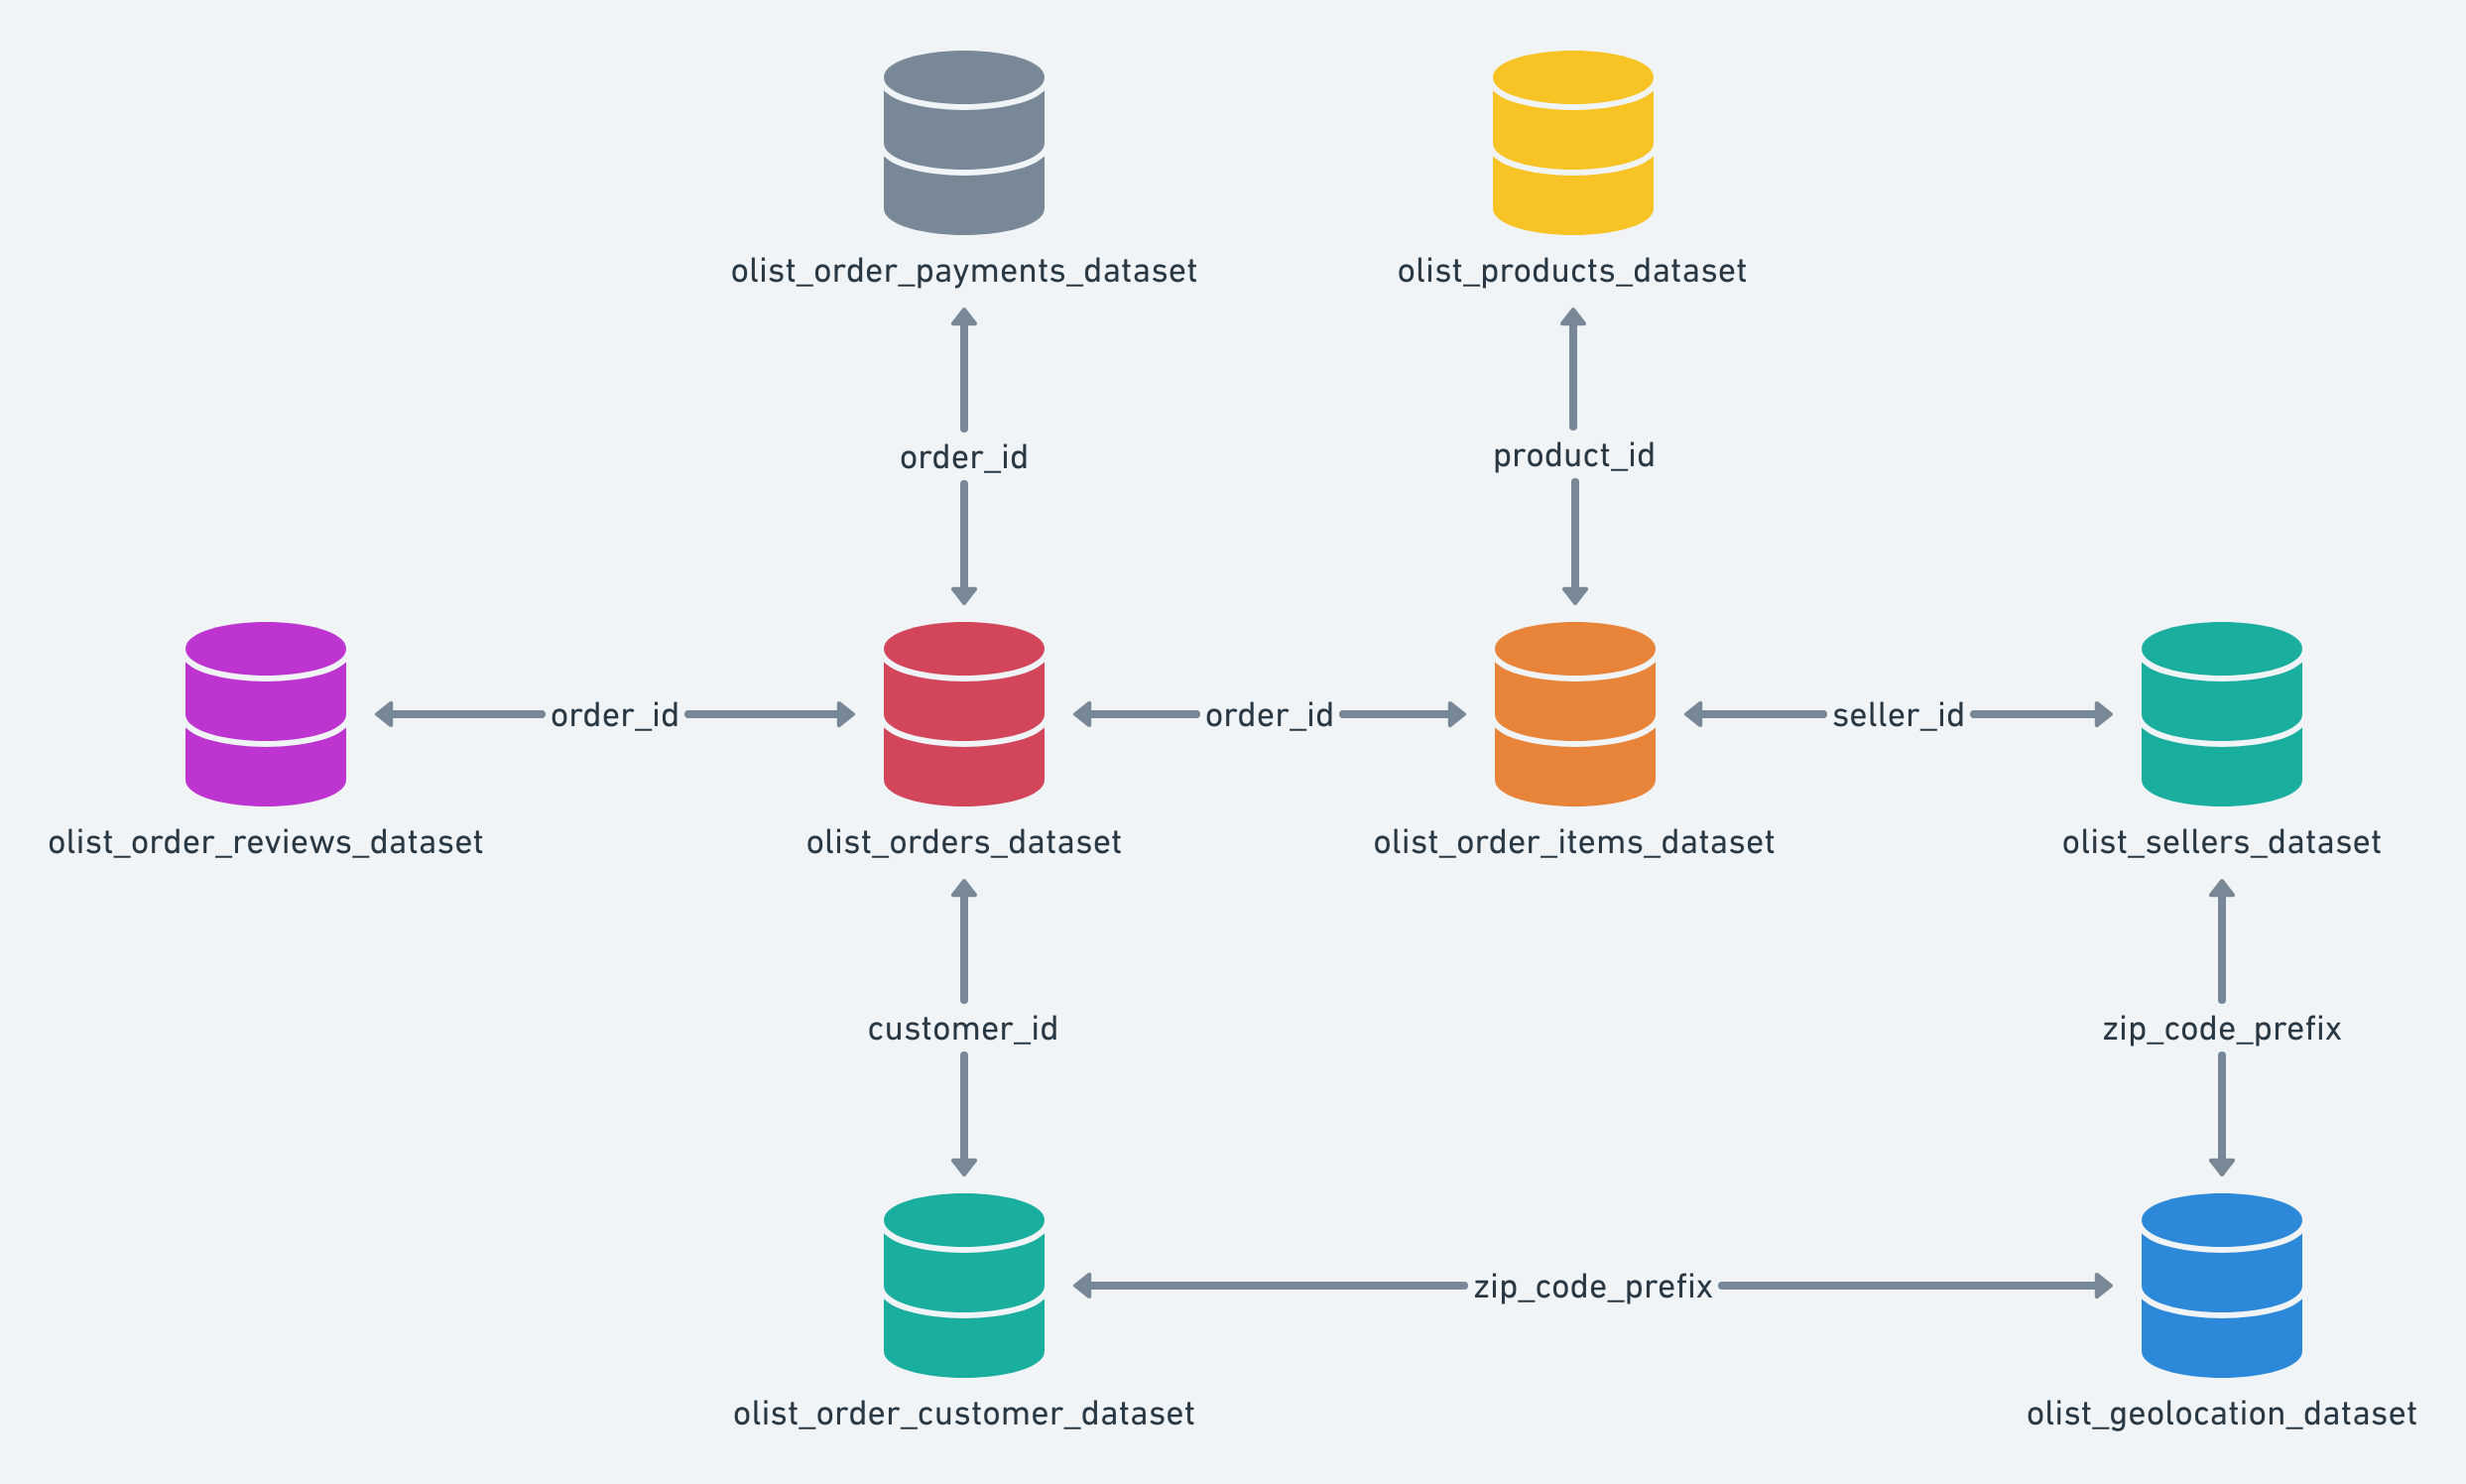

# Import Data

In [2]:
customers_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_customers_dataset.csv')
order_items_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_order_items_dataset.csv')
order_payments_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_orders_dataset.csv')
products_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_products_dataset.csv')
sellers_df = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/olist_sellers_dataset.csv')
product_category = pd.read_csv('/Volumes/MACINTOSH/MD 101/Dataset/archive (3)/product_category_name_translation.csv')

# Merge Data

In [3]:
df = pd.merge(orders_df, customers_df, on='customer_id', how='left')
df = pd.merge(df, order_items_df, on='order_id', how='left')
df = pd.merge(df, order_payments_df, on='order_id', how='left')
df = pd.merge(df, order_reviews_df, on='order_id', how='left')
df = pd.merge(df, products_df, on='product_id', how='left')
df = pd.merge(df, sellers_df, on='seller_id', how='left')
df = pd.merge(df, product_category, on='product_category_name', how='left')


In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


In [5]:
df.shape

(119143, 40)

# Missing Values and Duplicated Data

In [6]:
print(df.shape)
df.count()

(119143, 40)


order_id                         119143
customer_id                      119143
order_status                     119143
order_purchase_timestamp         119143
order_approved_at                118966
order_delivered_carrier_date     117057
order_delivered_customer_date    115722
order_estimated_delivery_date    119143
customer_unique_id               119143
customer_zip_code_prefix         119143
customer_city                    119143
customer_state                   119143
order_item_id                    118310
product_id                       118310
seller_id                        118310
shipping_limit_date              118310
price                            118310
freight_value                    118310
payment_sequential               119140
payment_type                     119140
payment_installments             119140
payment_value                    119140
review_id                        118146
review_score                     118146
review_comment_title              13989


In [7]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

review_comment_title             88.258647
review_comment_message           57.827988
order_delivered_customer_date     2.871339
product_category_name_english     2.154554
product_category_name             2.133571
product_name_lenght               2.133571
product_description_lenght        2.133571
product_photos_qty                2.133571
order_delivered_carrier_date      1.750837
review_answer_timestamp           0.836810
review_score                      0.836810
review_id                         0.836810
review_creation_date              0.836810
product_weight_g                  0.715946
product_length_cm                 0.715946
product_height_cm                 0.715946
product_width_cm                  0.715946
order_item_id                     0.699160
seller_id                         0.699160
shipping_limit_date               0.699160
price                             0.699160
freight_value                     0.699160
seller_zip_code_prefix            0.699160
seller_city

#### Drop Kolom

In [8]:
df = df.drop(columns=['order_item_id','review_comment_title', 'review_comment_message', 'customer_id',
         'customer_unique_id', 'review_id', 'product_category_name'])

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm    

In [11]:
df.duplicated().sum()

10139

In [12]:
df = df.drop_duplicates()

In [13]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

order_id                         0.0
payment_installments             0.0
seller_state                     0.0
seller_city                      0.0
seller_zip_code_prefix           0.0
product_width_cm                 0.0
product_height_cm                0.0
product_length_cm                0.0
product_weight_g                 0.0
product_photos_qty               0.0
product_description_lenght       0.0
product_name_lenght              0.0
review_answer_timestamp          0.0
review_creation_date             0.0
review_score                     0.0
payment_value                    0.0
payment_type                     0.0
order_status                     0.0
payment_sequential               0.0
freight_value                    0.0
price                            0.0
shipping_limit_date              0.0
seller_id                        0.0
product_id                       0.0
customer_state                   0.0
customer_city                    0.0
customer_zip_code_prefix         0.0
o

In [14]:
print(df.shape)
df.count()

(103054, 33)


order_id                         103054
order_status                     103054
order_purchase_timestamp         103054
order_approved_at                103054
order_delivered_carrier_date     103054
order_delivered_customer_date    103054
order_estimated_delivery_date    103054
customer_zip_code_prefix         103054
customer_city                    103054
customer_state                   103054
product_id                       103054
seller_id                        103054
shipping_limit_date              103054
price                            103054
freight_value                    103054
payment_sequential               103054
payment_type                     103054
payment_installments             103054
payment_value                    103054
review_score                     103054
review_creation_date             103054
review_answer_timestamp          103054
product_name_lenght              103054
product_description_lenght       103054
product_photos_qty               103054


# Data Transform

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103054 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103054 non-null  object 
 1   order_status                   103054 non-null  object 
 2   order_purchase_timestamp       103054 non-null  object 
 3   order_approved_at              103054 non-null  object 
 4   order_delivered_carrier_date   103054 non-null  object 
 5   order_delivered_customer_date  103054 non-null  object 
 6   order_estimated_delivery_date  103054 non-null  object 
 7   customer_zip_code_prefix       103054 non-null  int64  
 8   customer_city                  103054 non-null  object 
 9   customer_state                 103054 non-null  object 
 10  product_id                     103054 non-null  object 
 11  seller_id                      103054 non-null  object 
 12  shipping_limit_date            1030

In [16]:
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])


### Datetime Features

In [17]:
datetime_cols = df.select_dtypes(['datetime64[ns]'])
datetime_cols.columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

### Categorical Features

In [18]:
cat_cols = df.select_dtypes(['object'])
cat_cols.columns

Index(['order_id', 'order_status', 'customer_city', 'customer_state',
       'product_id', 'seller_id', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

### Numercal Features

In [19]:
num_cols = df.select_dtypes(exclude=['datetime64[ns]', 'object'])
num_cols.columns

Index(['customer_zip_code_prefix', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix'],
      dtype='object')

# EDA

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_purchase_timestamp,103054,2018-01-01 02:14:30.888311040,2016-10-03 09:44:50,2017-09-12 16:06:38,2018-01-19 13:09:39,2018-05-05 16:05:17.750000128,2018-08-29 15:00:37,NaN
order_approved_at,103054,2018-01-01 12:26:01.672142848,2016-10-04 09:43:32,2017-09-12 22:57:29.750000128,2018-01-19 19:49:45,2018-05-05 22:13:06.500000,2018-08-29 15:10:26,NaN
order_delivered_carrier_date,103054,2018-01-04 07:19:15.118685184,2016-10-08 10:34:01,2017-09-14 20:57:27.249999872,2018-01-23 20:43:24.500000,2018-05-08 14:10:30,2018-09-11 19:48:28,NaN
order_delivered_customer_date,103054,2018-01-13 13:32:17.988995840,2016-10-11 13:46:32,2017-09-22 20:34:44,2018-02-01 18:59:38.500000,2018-05-15 21:35:17.249999872,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,103054,2018-01-24 21:59:53.991499520,2016-10-27 00:00:00,2017-10-03 00:00:00,2018-02-15 00:00:00,2018-05-28 00:00:00,2018-10-25 00:00:00,NaN
customer_zip_code_prefix,103054.0,35085.737283,1003.0,11320.0,24358.0,58600.0,99980.0,29801.161068
shipping_limit_date,103054,2018-01-07 15:47:50.926776320,2016-10-08 10:34:01,2017-09-19 16:46:41.750000128,2018-01-26 00:29:22.500000,2018-05-10 19:50:41.500000,2020-04-09 22:35:08,NaN
price,103054.0,123.477013,0.85,40.0,78.0,138.0,6735.0,186.251861
freight_value,103054.0,20.118743,0.0,13.15,16.36,21.25,409.68,15.800105
payment_sequential,103054.0,1.090487,1.0,1.0,1.0,1.0,26.0,0.671799


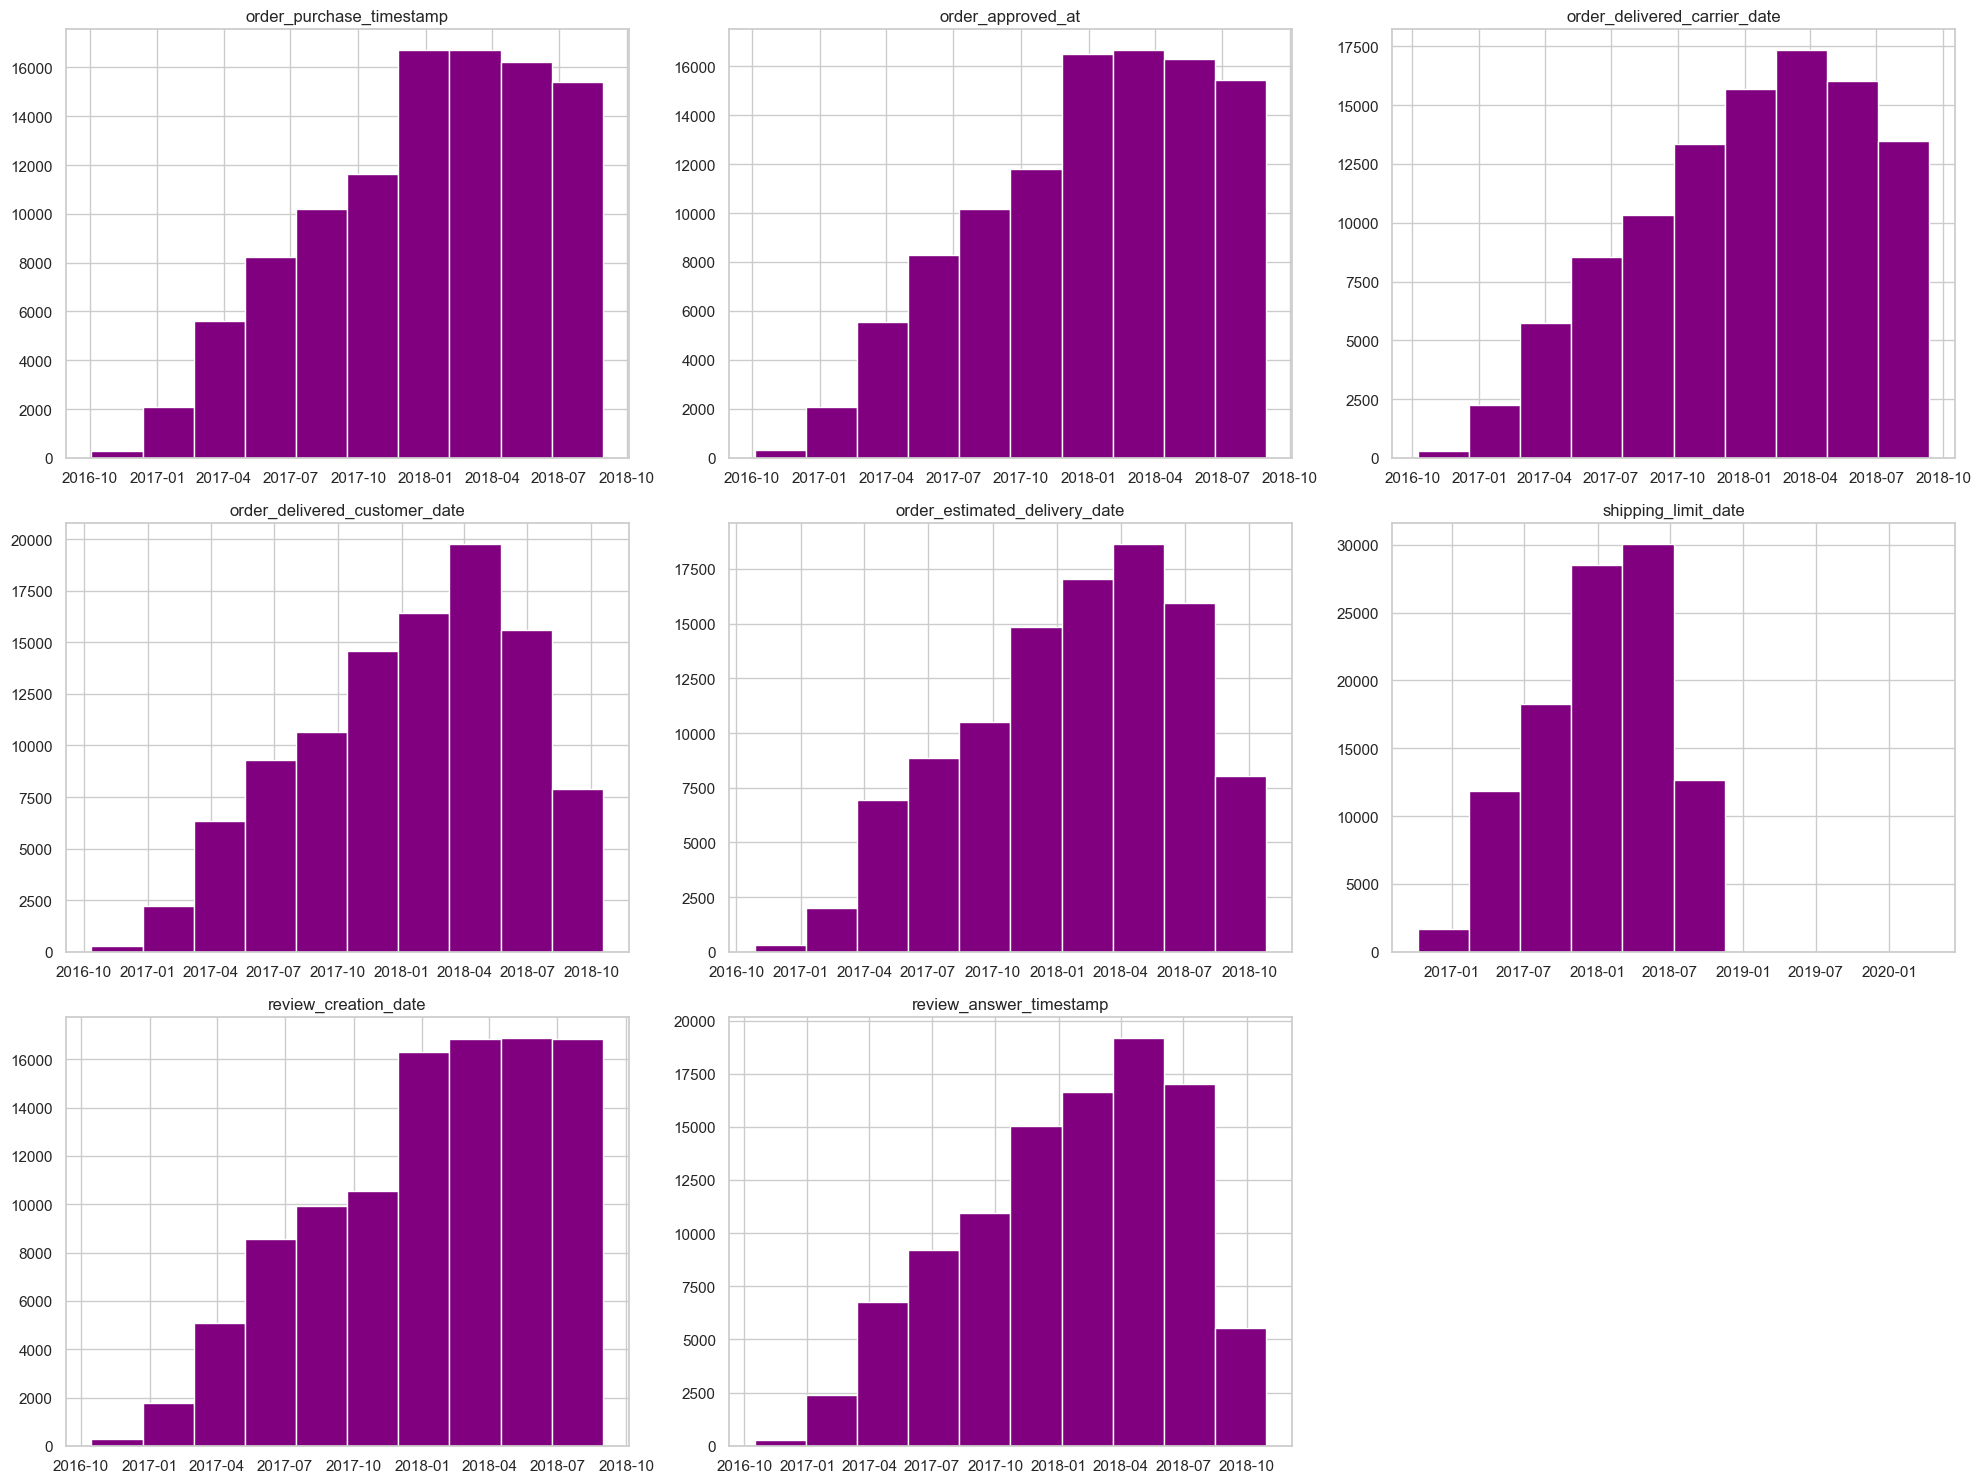

In [21]:
datetime_cols.hist(figsize=(20, 15), color='purple')
plt.tight_layout()

plt.show()

Terlihat bahwa data kebanyakan menumpuk diantara tahun 2017 ke 2018

In [22]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,2018-08-08,2018-08-08 18:37:50,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,2018-08-18,2018-08-22 19:07:58,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto


## Datetime

<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

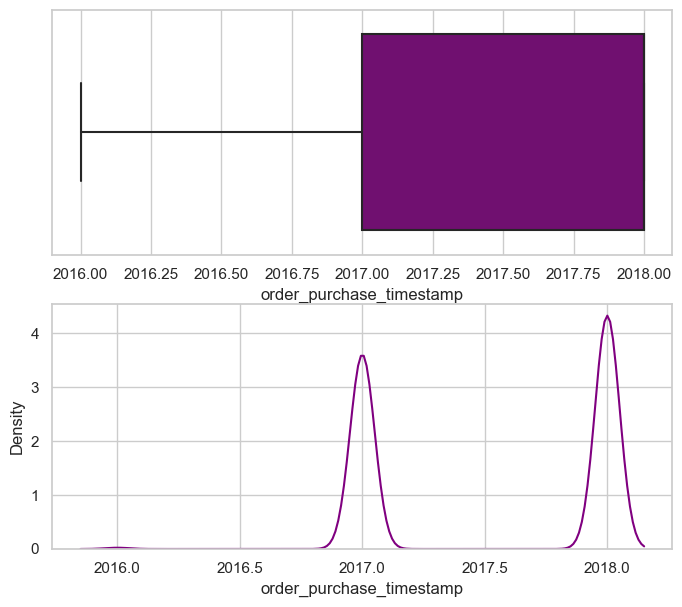

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(8, 7))
sns.boxplot(data=df, x=df['order_purchase_timestamp'].dt.year, color='purple', ax=axs[0])
sns.kdeplot(data=df, x=df['order_purchase_timestamp'].dt.year, color='purple', ax=axs[1])


In [24]:
df.order_purchase_timestamp.dt.year.value_counts()

order_purchase_timestamp
2018    56045
2017    46709
2016      300
Name: count, dtype: int64

<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

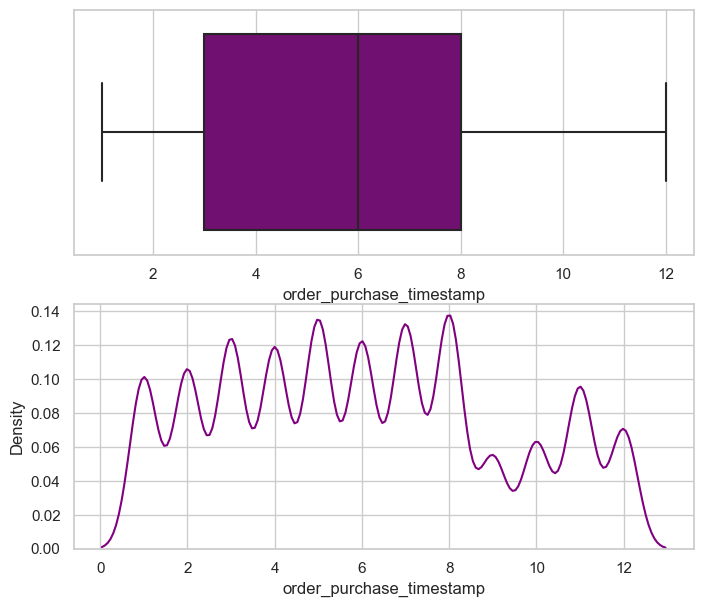

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(8, 7))
sns.boxplot(data=df, x=df['order_purchase_timestamp'].dt.month, color='purple', ax=axs[0])
sns.kdeplot(data=df, x=df['order_purchase_timestamp'].dt.month, color='purple', ax=axs[1])

In [26]:
df.order_purchase_timestamp.dt.month.value_counts()

order_purchase_timestamp
8     11299
5     11048
7     10796
3     10116
6      9960
4      9682
2      8625
1      8311
11     7829
12     5790
10     5141
9      4457
Name: count, dtype: int64

<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

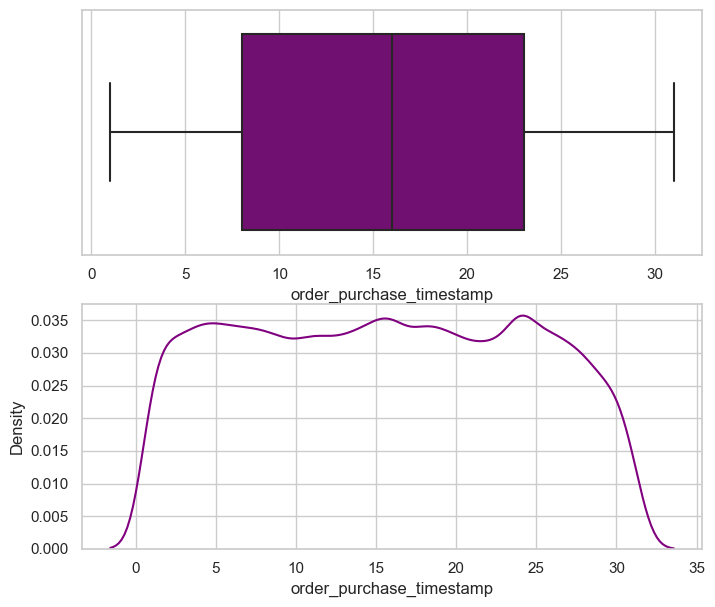

In [27]:
fig, axs = plt.subplots(2, 1, figsize=(8, 7))
sns.boxplot(data=df, x=df['order_purchase_timestamp'].dt.day, color='purple', ax=axs[0])
sns.kdeplot(data=df, x=df['order_purchase_timestamp'].dt.day, color='purple', ax=axs[1])

<Axes: xlabel='order_purchase_timestamp', ylabel='Density'>

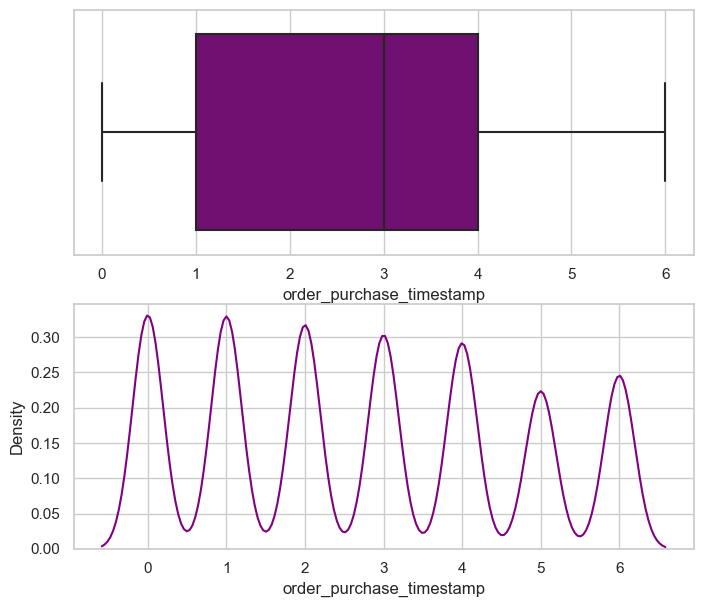

In [28]:
fig, axs = plt.subplots(2, 1, figsize=(8, 7))
sns.boxplot(data=df, x=df['order_purchase_timestamp'].dt.day_of_week, color='purple', ax=axs[0])
sns.kdeplot(data=df, x=df['order_purchase_timestamp'].dt.day_of_week, color='purple', ax=axs[1])

In [29]:
df.order_purchase_timestamp.dt.day_of_week.value_counts()

order_purchase_timestamp
0    16713
1    16629
2    16016
3    15295
4    14719
6    12400
5    11282
Name: count, dtype: int64

### Tren penjualan per tahun

In [30]:
# Membuat kolom tahun dari kolom order_purchase_timestamp
df['order_purchase_year'] = df['order_purchase_timestamp'].dt.year

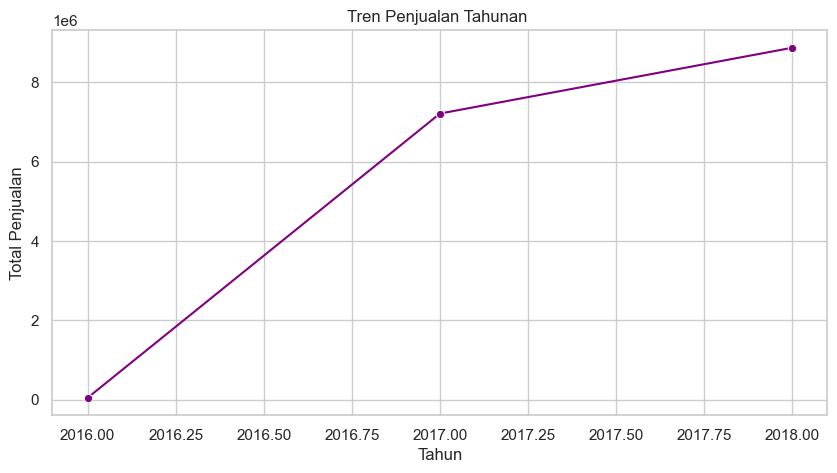

In [31]:
# Menghitung total penjualan per tahun
yearly_sales = df.groupby('order_purchase_year')['payment_value'].sum()

# Mengatur gaya plot menggunakan Seaborn
sns.set(style="whitegrid")

# Membuat plot bar untuk melihat tren penjualan tahunan
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', color = 'purple')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.title('Tren Penjualan Tahunan ')
plt.show()

In [32]:
yearly_sales

order_purchase_year
2016      50030.69
2017    7211988.50
2018    8870453.67
Name: payment_value, dtype: float64

Terlihat bahwa tren penjualan tahunan meningkat sangat signifikan dimulai di tahun 2016 sampai 2018, tidak ada penurunan sama skali di tiap tahunnnya

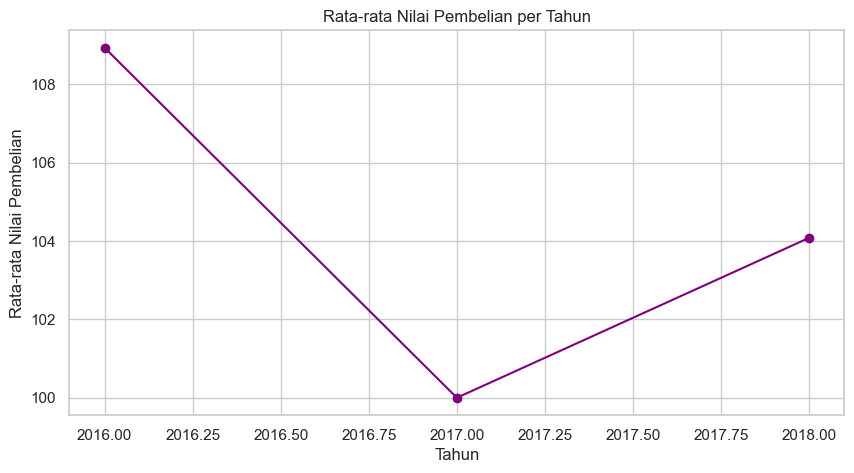

In [33]:
average_payment_per_year = df.groupby('order_purchase_year')['payment_value'].median()

plt.figure(figsize=(10, 5))
plt.plot(average_payment_per_year.index, average_payment_per_year.values, marker='o', color='purple')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai Pembelian')
plt.title('Rata-rata Nilai Pembelian per Tahun')
plt.grid(True)

plt.show()

In [34]:
average_payment_per_year

order_purchase_year
2016    108.93
2017    100.00
2018    104.08
Name: payment_value, dtype: float64

Terlihat pada tahun 2016 ke 2017 rata-rata pembelian menurun signifikan, kemudian dari 2017 ke 2018 kembali naik walaupun tidak sebanding dengan nilai rata-rata pembeliann di tahun 2016

In [35]:
# Menambahkan kolom 'discount_amount' yang berisi perbedaan antara harga sebenarnya dan harga yang diharapkan
df['discount_amount'] = df['price'] - df['payment_value']

# Menampilkan pesanan-pesanan dengan diskon (diskon > 0)
discounted_orders = df[df['discount_amount'] > 0]

# Menampilkan pesanan-pesanan dengan diskon beserta kolom 'order_id' dan 'discount_amount'
discounted_orders[['product_category_name_english', 'price', 'payment_value', 'discount_amount']].head(20)

,product_category_name_english,price,payment_value,discount_amount
0,housewares,29.99,18.12,11.87
1,housewares,29.99,2.00,27.99
2,housewares,29.99,18.59,11.40
12,office_furniture,149.99,8.34,141.65
23,telephony,76.00,62.15,13.85
24,telephony,76.00,24.86,51.14
25,telephony,76.00,5.96,70.04
97,watches_gifts,219.00,7.08,211.92
120,bed_bath_table,17.90,6.83,11.07
201,watches_gifts,199.00,29.13,169.87


In [36]:
df['discount_percentage'] = ((df['price'] - df['payment_value']) / df['price']) * 100

In [37]:
df[['price', 'payment_value', 'discount_amount', 'discount_percentage']].describe()


,price,payment_value,discount_amount,discount_percentage
count,103054.000000,103054.000000,103054.000000,103054.000000
mean,123.477013,156.543879,-33.066866,-54.536810
std,186.251861,215.601612,105.460939,147.838492
min,0.850000,0.000000,-11984.080000,-16242.500000
25%,40.000000,57.740000,-26.710000,-50.240806
50%,78.000000,102.030000,-17.060000,-23.838867
75%,138.000000,175.990000,-12.990000,-12.371998
max,6735.000000,13664.080000,3763.560000,100.000000


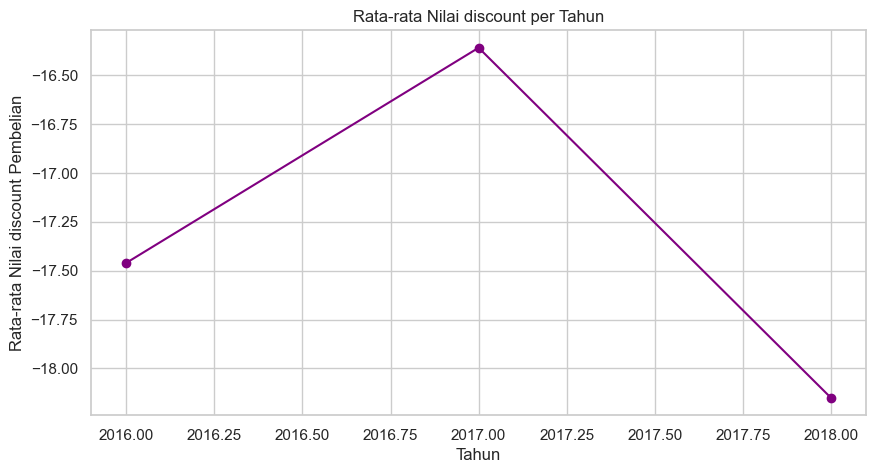

In [38]:
average_discount_per_year = df.groupby('order_purchase_year')['discount_amount'].median()

plt.figure(figsize=(10, 5))
plt.plot(average_discount_per_year.index, average_discount_per_year.values, marker='o', color='purple')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Nilai discount Pembelian')
plt.title('Rata-rata Nilai discount per Tahun')
plt.grid(True)

plt.show()

In [39]:
average_discount_per_year

order_purchase_year
2016   -17.46
2017   -16.36
2018   -18.15
Name: discount_amount, dtype: float64

Pada tahun 2016 ke 2017 rata-rata discount mengalami penurunan yang mengabakibatkan sebelumnya rata-rata nilai pembelian menurun. Kemudian pada tahun 2017 ke 2018 dari rata-rata discount yang terlihat, perusahaan menaikkan discount yang sangat signifikan, hal tersebut mengindikasikan bahwa penyebab naiknya kembali rata-rata pembelian sebelumnya dari tahun 2017 ke 2018 itu disebabkan karena naiknya discount pada tiap pembelian.

### Top 10 kategori produk dengan discount amount tertinggi

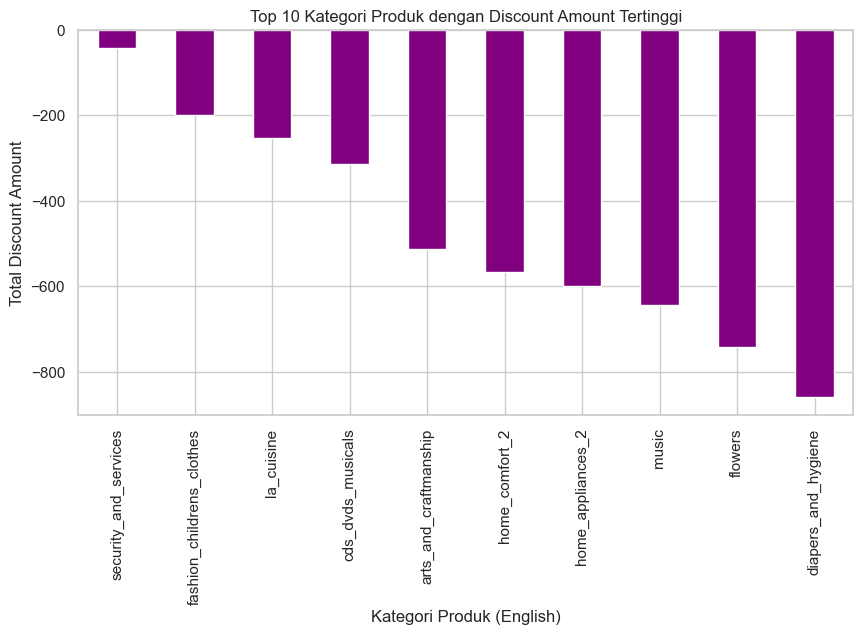

In [40]:
# Mengambil 10 kategori produk dengan discount amount tertinggi
top_10_discount_categories = df.groupby('product_category_name_english')['discount_amount'].sum().nlargest(10)

# Membuat plot bar untuk menampilkan top 10 kategori produk dengan discount amount tertinggi
plt.figure(figsize=(10, 5))
top_10_discount_categories.plot(kind='bar', color='purple')
plt.xlabel('Kategori Produk (English)')
plt.ylabel('Total Discount Amount')
plt.title('Top 10 Kategori Produk dengan Discount Amount Tertinggi')
plt.xticks(rotation=90)

plt.show()

In [41]:
top_10_discount_categories

product_category_name_english
security_and_services        -41.22
fashion_childrens_clothes   -199.03
la_cuisine                  -252.89
cds_dvds_musicals           -314.99
arts_and_craftmanship       -512.16
home_comfort_2              -565.57
home_appliances_2           -600.59
music                       -643.23
flowers                     -741.71
diapers_and_hygiene         -858.40
Name: discount_amount, dtype: float64

## Numerical

In [42]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year,discount_amount,discount_percentage
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.87,39.579860
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,27.99,93.331110
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.40,38.012671
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,2018-08-08,2018-08-08 18:37:50,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,2018,-22.76,-19.174389
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,2018-08-18,2018-08-22 19:07:58,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,2018,-19.22,-12.020013


In [43]:
num_cols.columns

Index(['customer_zip_code_prefix', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix'],
      dtype='object')

### Discreat

In [44]:
disc_cols = df[['payment_installments', 'review_score']]

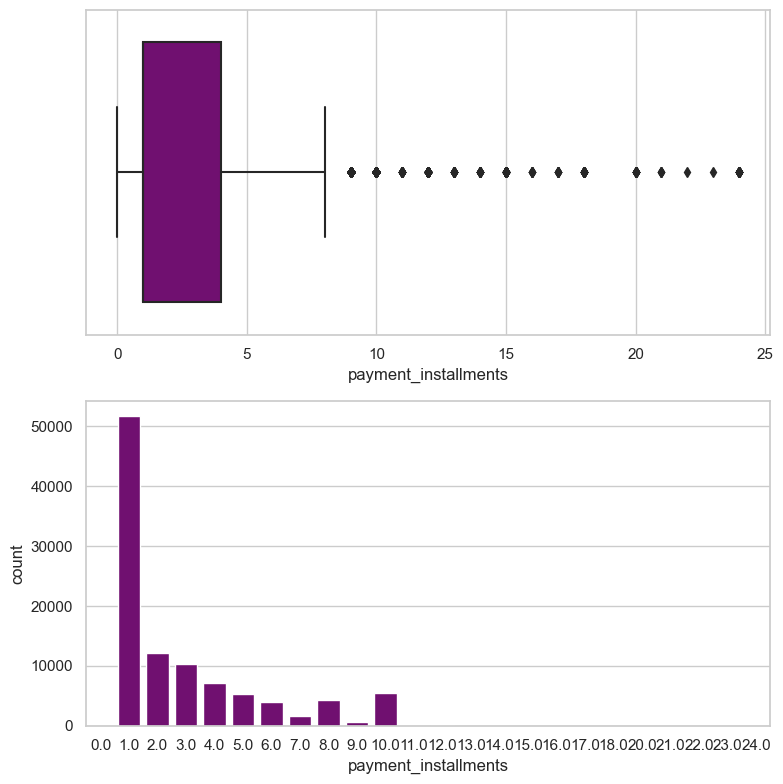

In [45]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
sns.boxplot(data=df, x='payment_installments', color='purple', ax=axs[0])
sns.countplot(data=df, x='payment_installments', color='purple', ax=axs[1])
plt.tight_layout()

Sebagian besar pelanggan cenderung memilih opsi pembayaran dengan jumlah installment yang lebih banyak, mungkin untuk memudahkan cashflow atau mencicil pembelian. Namun, ada juga pelanggan yang memilih pembayaran sekaligus dalam 1 installment.

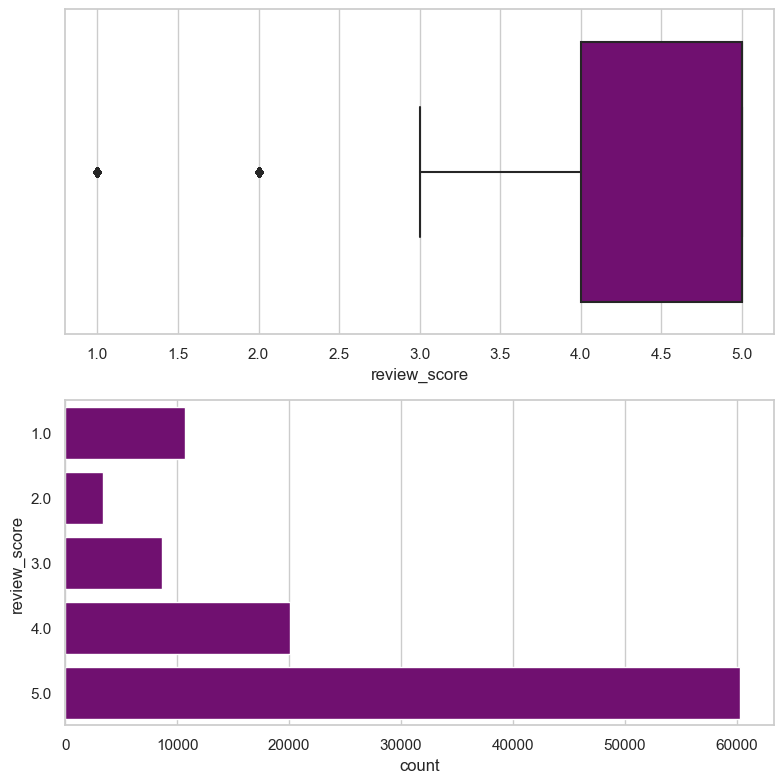

In [46]:
fig, axs = plt.subplots(2,1, figsize=(8,8))
sns.boxplot(data=df, x='review_score', color='purple', ax=axs[0])
sns.countplot(data=df, y='review_score', color='purple', ax=axs[1])
plt.tight_layout()

Sebagian besar skor ulasan terpusat pada rentang 4,0 hingga 5,0, dengan puncak yang signifikan di sekitar skor 5,0.
Hanya sedikit skor ulasan di bawah 3,0, hal tersebut mengindikasikan bahwa mayoritas produk memiliki skor ulasan yang relatif tinggi.

### Continuous

In [47]:
cont_cols = df[['customer_zip_code_prefix', 'price', 'freight_value',
       'payment_sequential', 'payment_value',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix']]

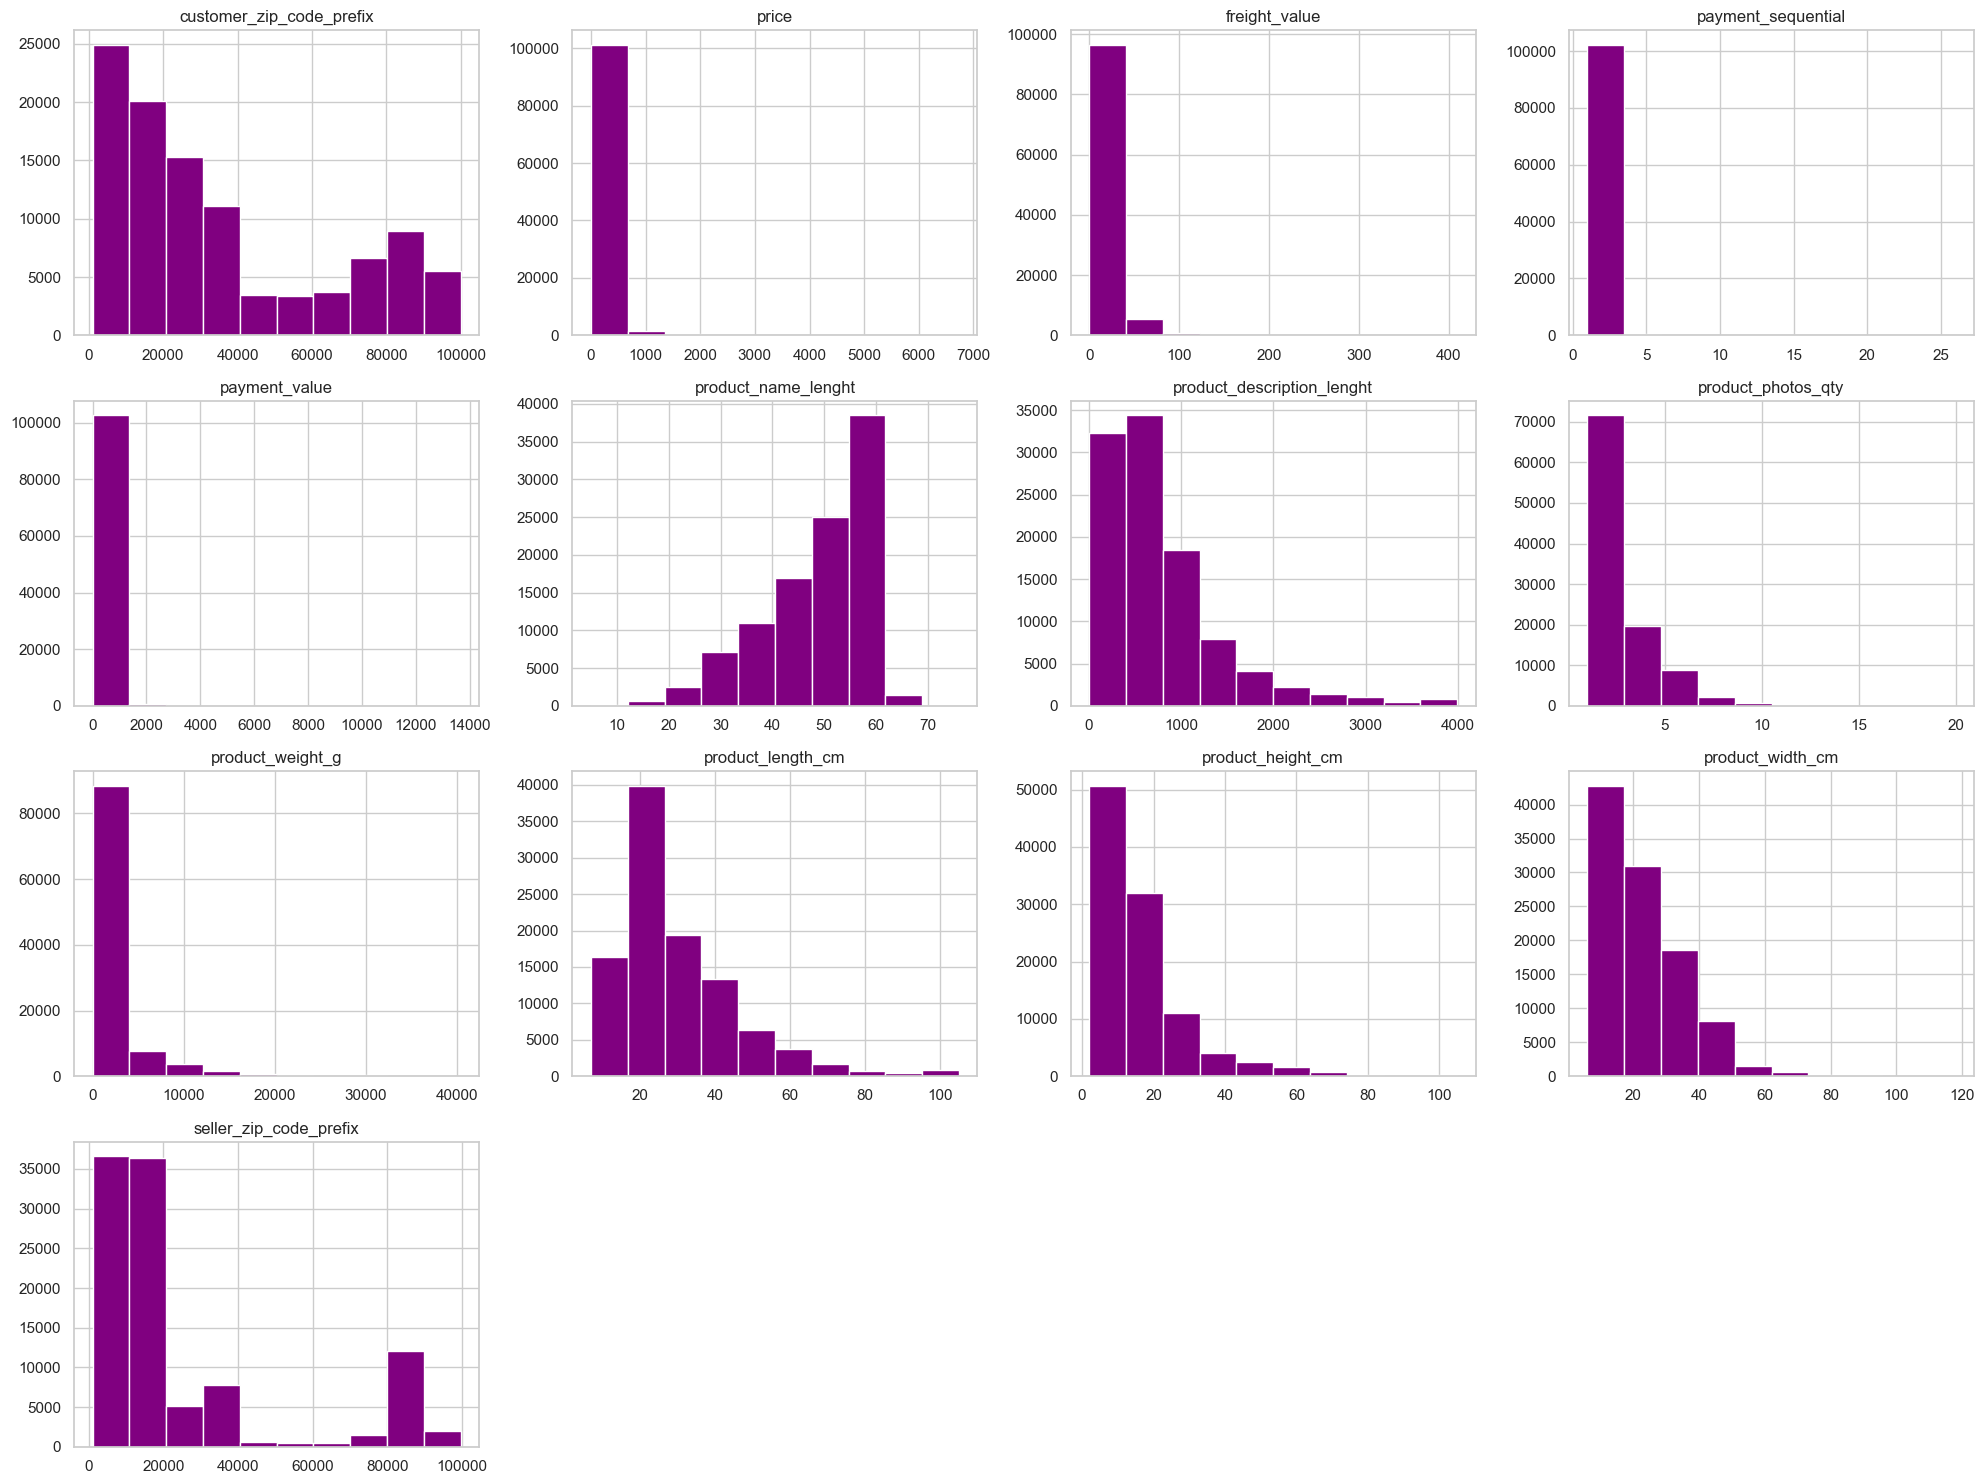

In [48]:
cont_cols.hist(figsize=(20, 15), color='purple')
plt.tight_layout()

plt.show()

1. Distribusi Kode Pos Pelanggan (customer_zip_code_prefix):
- Grafik menunjukkan bahwa mayoritas pelanggan memiliki kode pos dalam rentang 20000-40000, dengan puncak di sekitar 30000-40000.
- Terdapat beberapa pelanggan dengan kode pos di luar rentang ini, namun jumlahnya relatif kecil.
2. Distribusi Harga Produk (price):
- Harga produk cenderung berada dalam rentang 60.000 hingga 90.000, dengan puncak di sekitar 80.000.
- Ada beberapa produk dengan harga di luar rentang tersebut, namun frekuensinya lebih rendah.
3. Distribusi Berat Produk (freight_value):
- Berat produk mayoritas berkisar antara 50.000 hingga 90.000 gram.
- Terdapat beberapa produk dengan berat di luar rentang ini, namun jumlahnya tidak terlalu banyak.
4. Distribusi Jumlah Pembayaran Angsuran (payment_sequential):
- Grafik menunjukkan bahwa sebagian besar pelanggan melakukan pembayaran dalam 20 hingga 25 angsuran.
- Ada juga beberapa pelanggan yang melakukan pembayaran dalam kurang dari 10 angsuran.
5. Karakteristik Produk:
- Grafik lainnya memberikan informasi mengenai dimensi produk, seperti panjang, tinggi, dan lebar.
- Terlihat bahwa distribusi ukuran produk cenderung terpusat pada rentang tertentu, meskipun masih terdapat variasi.

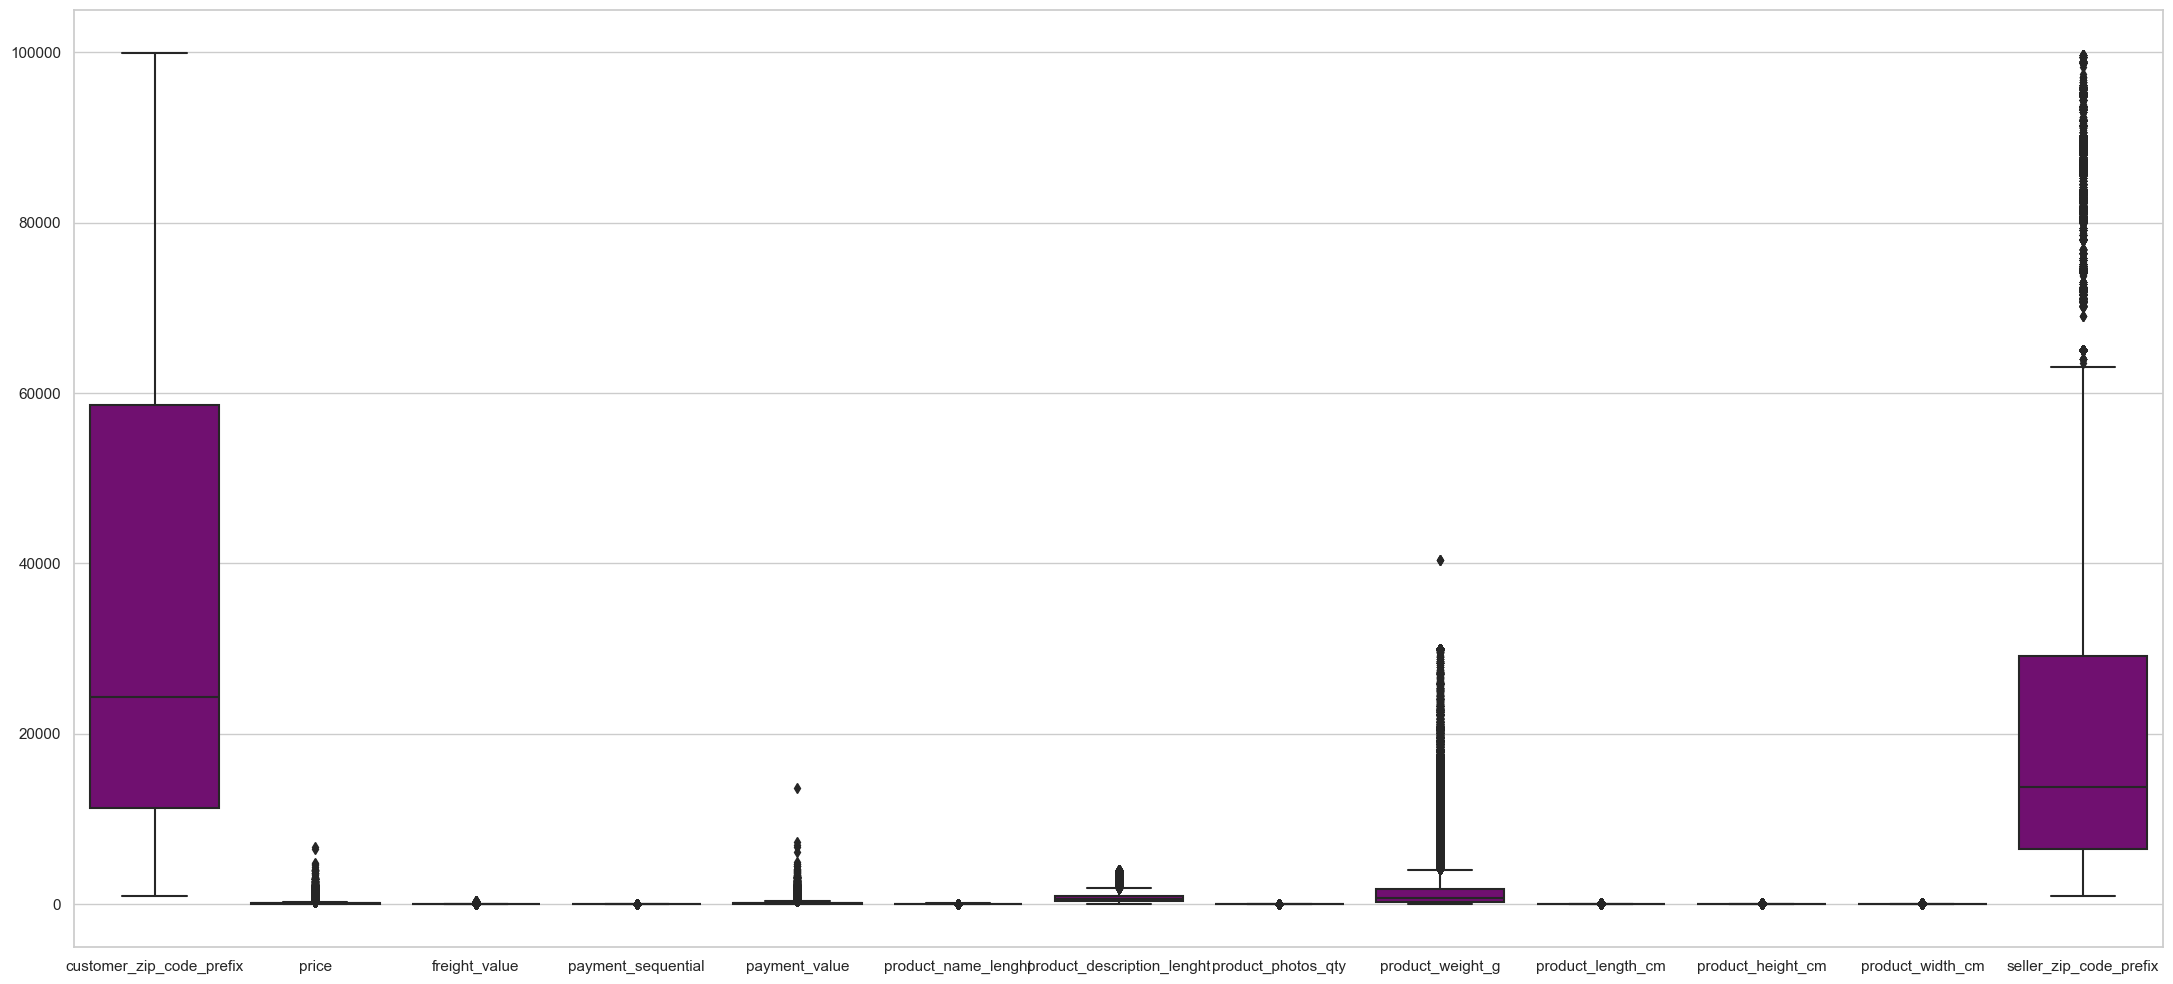

In [49]:
plt.figure(figsize=(22,10))
sns.boxplot(data=cont_cols, color='purple')
plt.tight_layout()
plt.show()

1. Kode Pos Pelanggan (customer_zip_code_prefix):
- Distribusi kode pos pelanggan menunjukkan puncak pada rentang 40.000-60.000, dengan jumlah yang cukup besar.
- Terdapat juga beberapa pelanggan dengan kode pos di luar rentang ini, tetapi dalam jumlah yang lebih kecil.
2. Harga Produk (price):
- Grafik menunjukkan bahwa harga produk sebagian besar berkisar antara 70.000 hingga 90.000, dengan puncak di sekitar 80.000.
- Ada beberapa produk dengan harga di luar rentang ini, tetapi frekuensinya lebih rendah.
3. Berat Produk (freight_value):
- Berat produk sebagian besar terkonsentrasi pada rentang 50.000 hingga 90.000 gram.
- Terdapat beberapa produk dengan berat di luar rentang ini, namun jumlahnya tidak terlalu banyak.
4. Pembayaran Angsuran (payment_sequential dan payment_value):
- Grafik menunjukkan bahwa sebagian besar pelanggan melakukan pembayaran dalam 15 hingga 20 angsuran.
- Jumlah angsuran terbanyak berada di sekitar 20 angsuran.

In [50]:
df.price.describe()

count    103054.000000
mean        123.477013
std         186.251861
min           0.850000
25%          40.000000
50%          78.000000
75%         138.000000
max        6735.000000
Name: price, dtype: float64

In [51]:
df[df['price'] > 6000]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year,discount_amount,discount_percentage
4161,f5136e38d1a14a4dbd87dff67da82701,delivered,2017-05-24 18:14:34,2017-05-26 02:45:17,2017-05-26 11:20:47,2017-06-05 17:09:48,2017-06-28,17506,marilia,SP,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,1.0,boleto,1.0,6726.66,5.0,2017-06-06,2017-06-07 19:35:23,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,74210.0,goiania,GO,art,2017,-227.66,-3.503000
26500,0812eb902a67711a1cb742b3cdaa65ae,delivered,2017-02-12 20:37:36,2017-02-12 20:45:12,2017-02-16 09:23:13,2017-03-03 14:23:18,2017-03-09,79042,campo grande,MS,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,1.0,credit_card,8.0,6929.31,5.0,2017-03-04,2017-03-04 21:40:41,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,3635.0,sao paulo,SP,housewares,2017,-194.31,-2.885078


In [52]:
len(df[df['price'] > 6000])

2

In [53]:
df.price.value_counts()

price
59.90      2189
69.90      1912
49.90      1725
89.90      1494
99.90      1399
           ... 
108.70        1
1095.65       1
43.44         1
103.64        1
213.39        1
Name: count, Length: 5773, dtype: int64

In [54]:
df.groupby(['product_category_name_english', 'price']).size().reset_index()

,product_category_name_english,price,0
0,agro_industry_and_commerce,12.99,1
1,agro_industry_and_commerce,13.00,1
2,agro_industry_and_commerce,19.50,11
3,agro_industry_and_commerce,21.99,10
4,agro_industry_and_commerce,22.00,3
...,...,...,...
17051,watches_gifts,2400.00,2
17052,watches_gifts,2700.00,1
17053,watches_gifts,2999.00,1
17054,watches_gifts,3700.00,1


In [55]:
#df_bed_bath_table = df[df['product_category_name_english']=='bed_bath_table']

In [56]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year,discount_amount,discount_percentage
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.87,39.579860
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,27.99,93.331110
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.40,38.012671
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,2018-08-08,2018-08-08 18:37:50,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,2018,-22.76,-19.174389
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,2018-08-18,2018-08-22 19:07:58,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,2018,-19.22,-12.020013


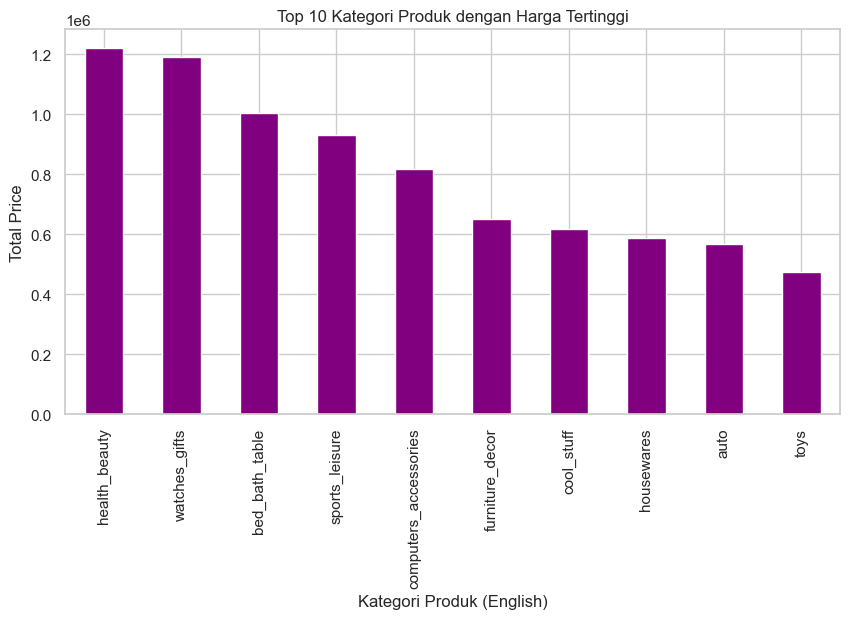

In [57]:
top_10_price_categories = df.groupby('product_category_name_english')['price'].sum().nlargest(10)

plt.figure(figsize=(10, 5))
top_10_price_categories.plot(kind='bar', color='purple')
plt.xlabel('Kategori Produk (English)')
plt.ylabel('Total Price')
plt.title('Top 10 Kategori Produk dengan Harga Tertinggi')
plt.xticks(rotation=90)
plt.show()

In [58]:
top_10_price_categories

product_category_name_english
health_beauty            1220880.35
watches_gifts            1190047.64
bed_bath_table           1005081.50
sports_leisure            930905.18
computers_accessories     817132.58
furniture_decor           650510.92
cool_stuff                617410.22
housewares                587800.20
auto                      566130.91
toys                      473786.33
Name: price, dtype: float64

In [59]:
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_approved_at']).dt.days

<Axes: xlabel='delivery_time', ylabel='Count'>

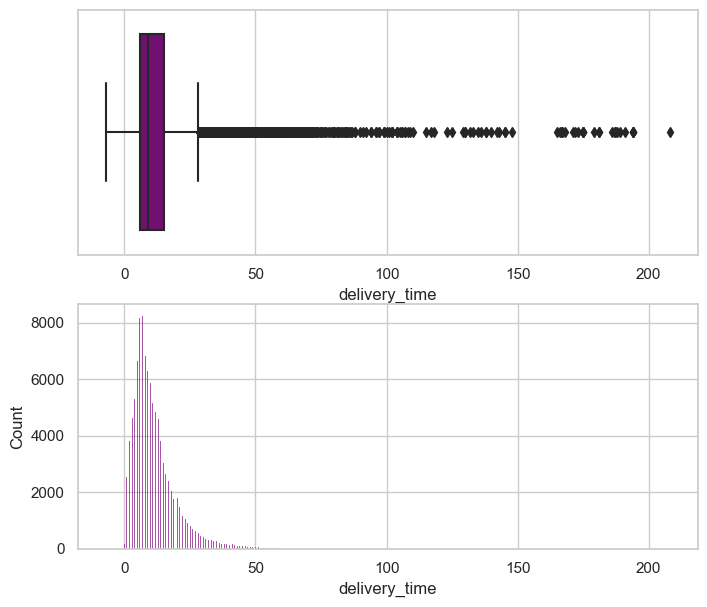

In [60]:
fig, axs = plt.subplots(2, 1, figsize=(8, 7))
sns.boxplot(data=df, x=df['delivery_time'], color='purple', ax=axs[0])
sns.histplot(data=df, x=df['delivery_time'], color='purple', ax=axs[1])


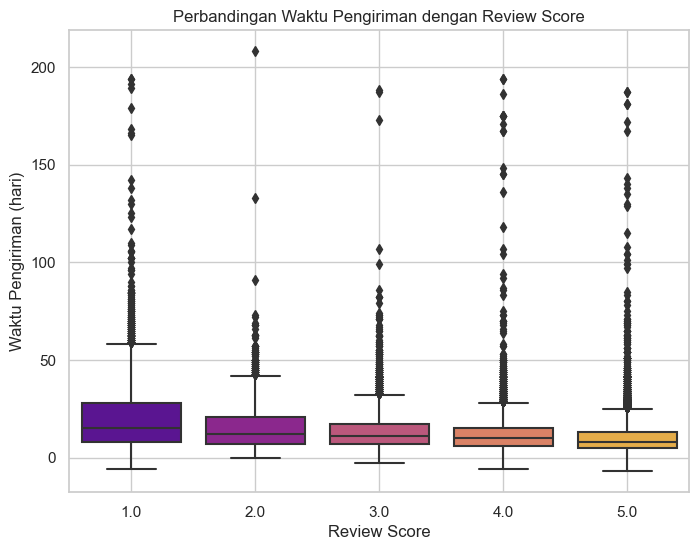

In [61]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df,y='delivery_time', x='review_score', palette='plasma')
plt.xlabel('Review Score')
plt.ylabel('Waktu Pengiriman (hari)')
plt.title('Perbandingan Waktu Pengiriman dengan Review Score')
plt.grid(True)
plt.show()

Pada review score terlihat bahwa orang yang memberikan nilai 1 cenderung memiliki waktu pengiriman yang lama

In [62]:
df.review_score.value_counts()

review_score
5.0    60327
4.0    20049
1.0    10703
3.0     8622
2.0     3353
Name: count, dtype: int64

In [63]:
# Korelasi antara delivery_time dan review_score
korelasi = df['delivery_time'].corr(df['review_score'])
print("Korelasi antara delivery_time dan review_score:", korelasi)


Korelasi antara delivery_time dan review_score: -0.31508609822616196


Semakin lama waktu pengiriman (delivery_time) pesanan, cenderung akan berdampak negatif pada tingkat kepuasan pelanggan (review_score). Artinya, pelanggan mungkin kurang puas jika pesanan mereka memerlukan waktu pengiriman yang lebih lama.

In [64]:
# Menentukan keterlambatan pengiriman (misalnya, lebih dari 5 hari)
keterlambatan = df[df['delivery_time'] > 5]
print("Jumlah pesanan yang mengalami keterlambatan:", len(keterlambatan))


Jumlah pesanan yang mengalami keterlambatan: 79863


## Categorical

In [65]:
cat_cols.columns

Index(['order_id', 'order_status', 'customer_city', 'customer_state',
       'product_id', 'seller_id', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

### Top 20 Customer City and Top 20 Seller City

In [66]:
df['customer_city'].value_counts().head(20)

customer_city
sao paulo                16158
rio de janeiro            7005
belo horizonte            2857
brasilia                  2196
curitiba                  1576
campinas                  1515
porto alegre              1426
salvador                  1306
guarulhos                 1218
sao bernardo do campo      966
niteroi                    927
santo andre                822
osasco                     778
santos                     733
sao jose dos campos        721
goiania                    705
fortaleza                  651
sorocaba                   637
recife                     626
jundiai                    580
Name: count, dtype: int64

In [67]:
df.seller_city.value_counts().head(20)

seller_city
sao paulo                25495
ibitinga                  7458
santo andre               2826
curitiba                  2819
belo horizonte            2378
rio de janeiro            2153
sao jose do rio preto     2105
ribeirao preto            2061
maringa                   1948
piracicaba                1842
guarulhos                 1804
itaquaquecetuba           1330
campinas                  1281
salto                     1255
praia grande              1247
campo limpo paulista      1204
guariba                   1157
sao bernardo do campo     1064
jacarei                    894
brasilia                   814
Name: count, dtype: int64

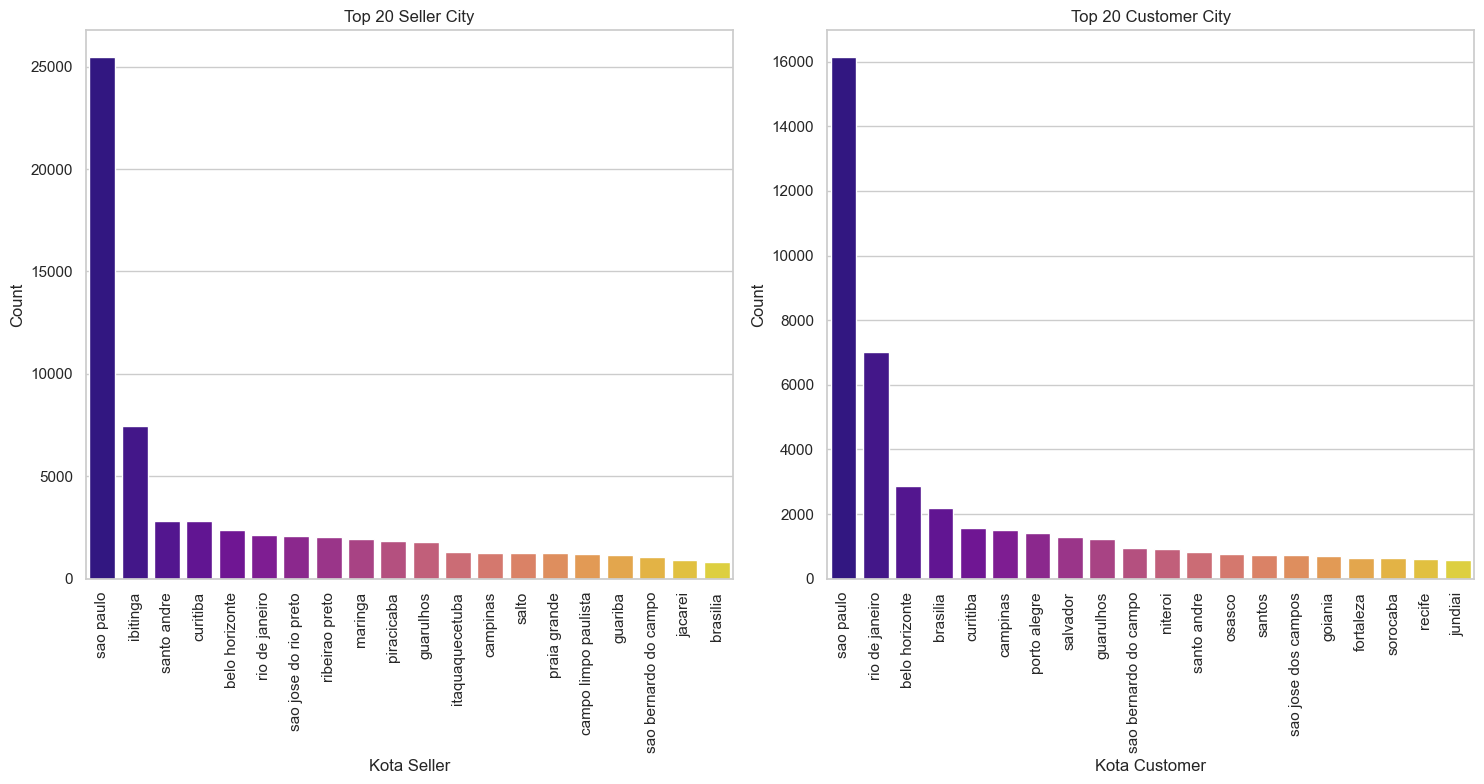

In [68]:
# Mengatur ukuran dan tata letak subplot
plt.figure(figsize=(15, 8))

# Subplot untuk seller_city
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='seller_city', order=df['seller_city'].value_counts().head(20).index, palette='plasma')
plt.xlabel('Kota Seller')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 20 Seller City')

# Subplot untuk customer_city
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='customer_city', order=df['customer_city'].value_counts().head(20).index, palette='plasma')
plt.xlabel('Kota Customer')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 20 Customer City')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


In [69]:
payment_type_counts = df['payment_type'].value_counts()
order_status_counts = df['order_status'].value_counts()

print(payment_type_counts)
print(order_status_counts)

payment_type
credit_card    76345
boleto         19555
voucher         5635
debit_card      1519
Name: count, dtype: int64
order_status
delivered    103047
canceled          7
Name: count, dtype: int64


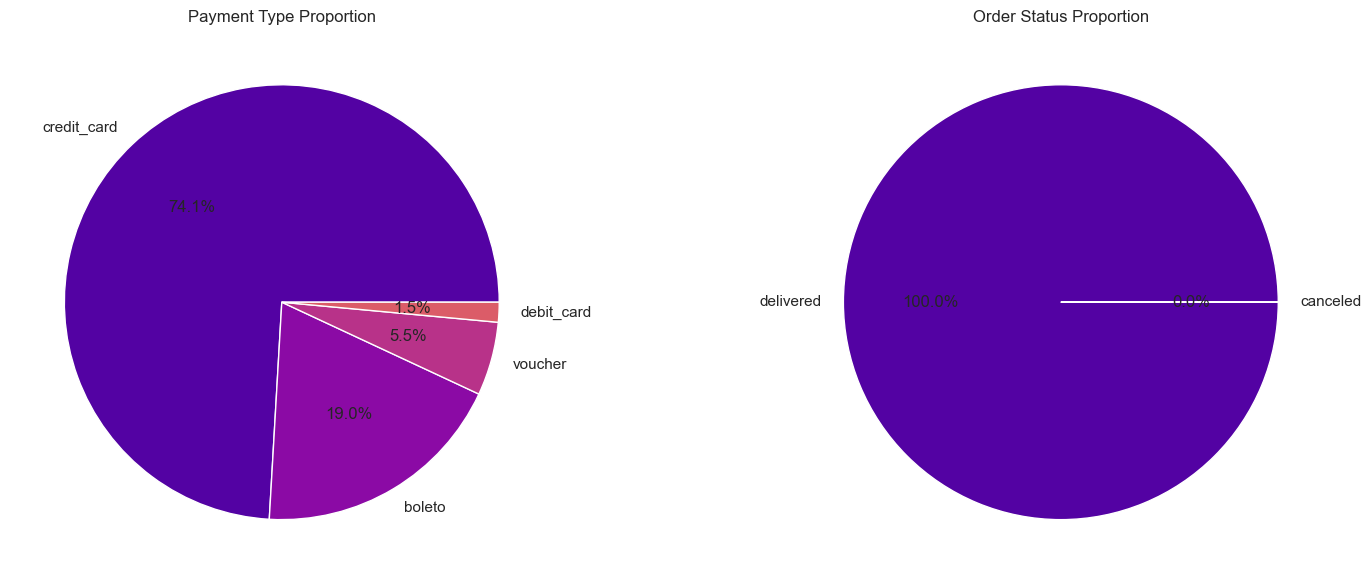

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Visualisasi pie chart untuk 'payment_type'
axes[0].pie(payment_type_counts, labels=payment_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'))
axes[0].set_title('Payment Type Proportion')

# Visualisasi pie chart untuk 'order_status'
axes[1].pie(order_status_counts, labels=order_status_counts.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'))
axes[1].set_title('Order Status Proportion')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()


In [71]:
cat_cols.columns

Index(['order_id', 'order_status', 'customer_city', 'customer_state',
       'product_id', 'seller_id', 'payment_type', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

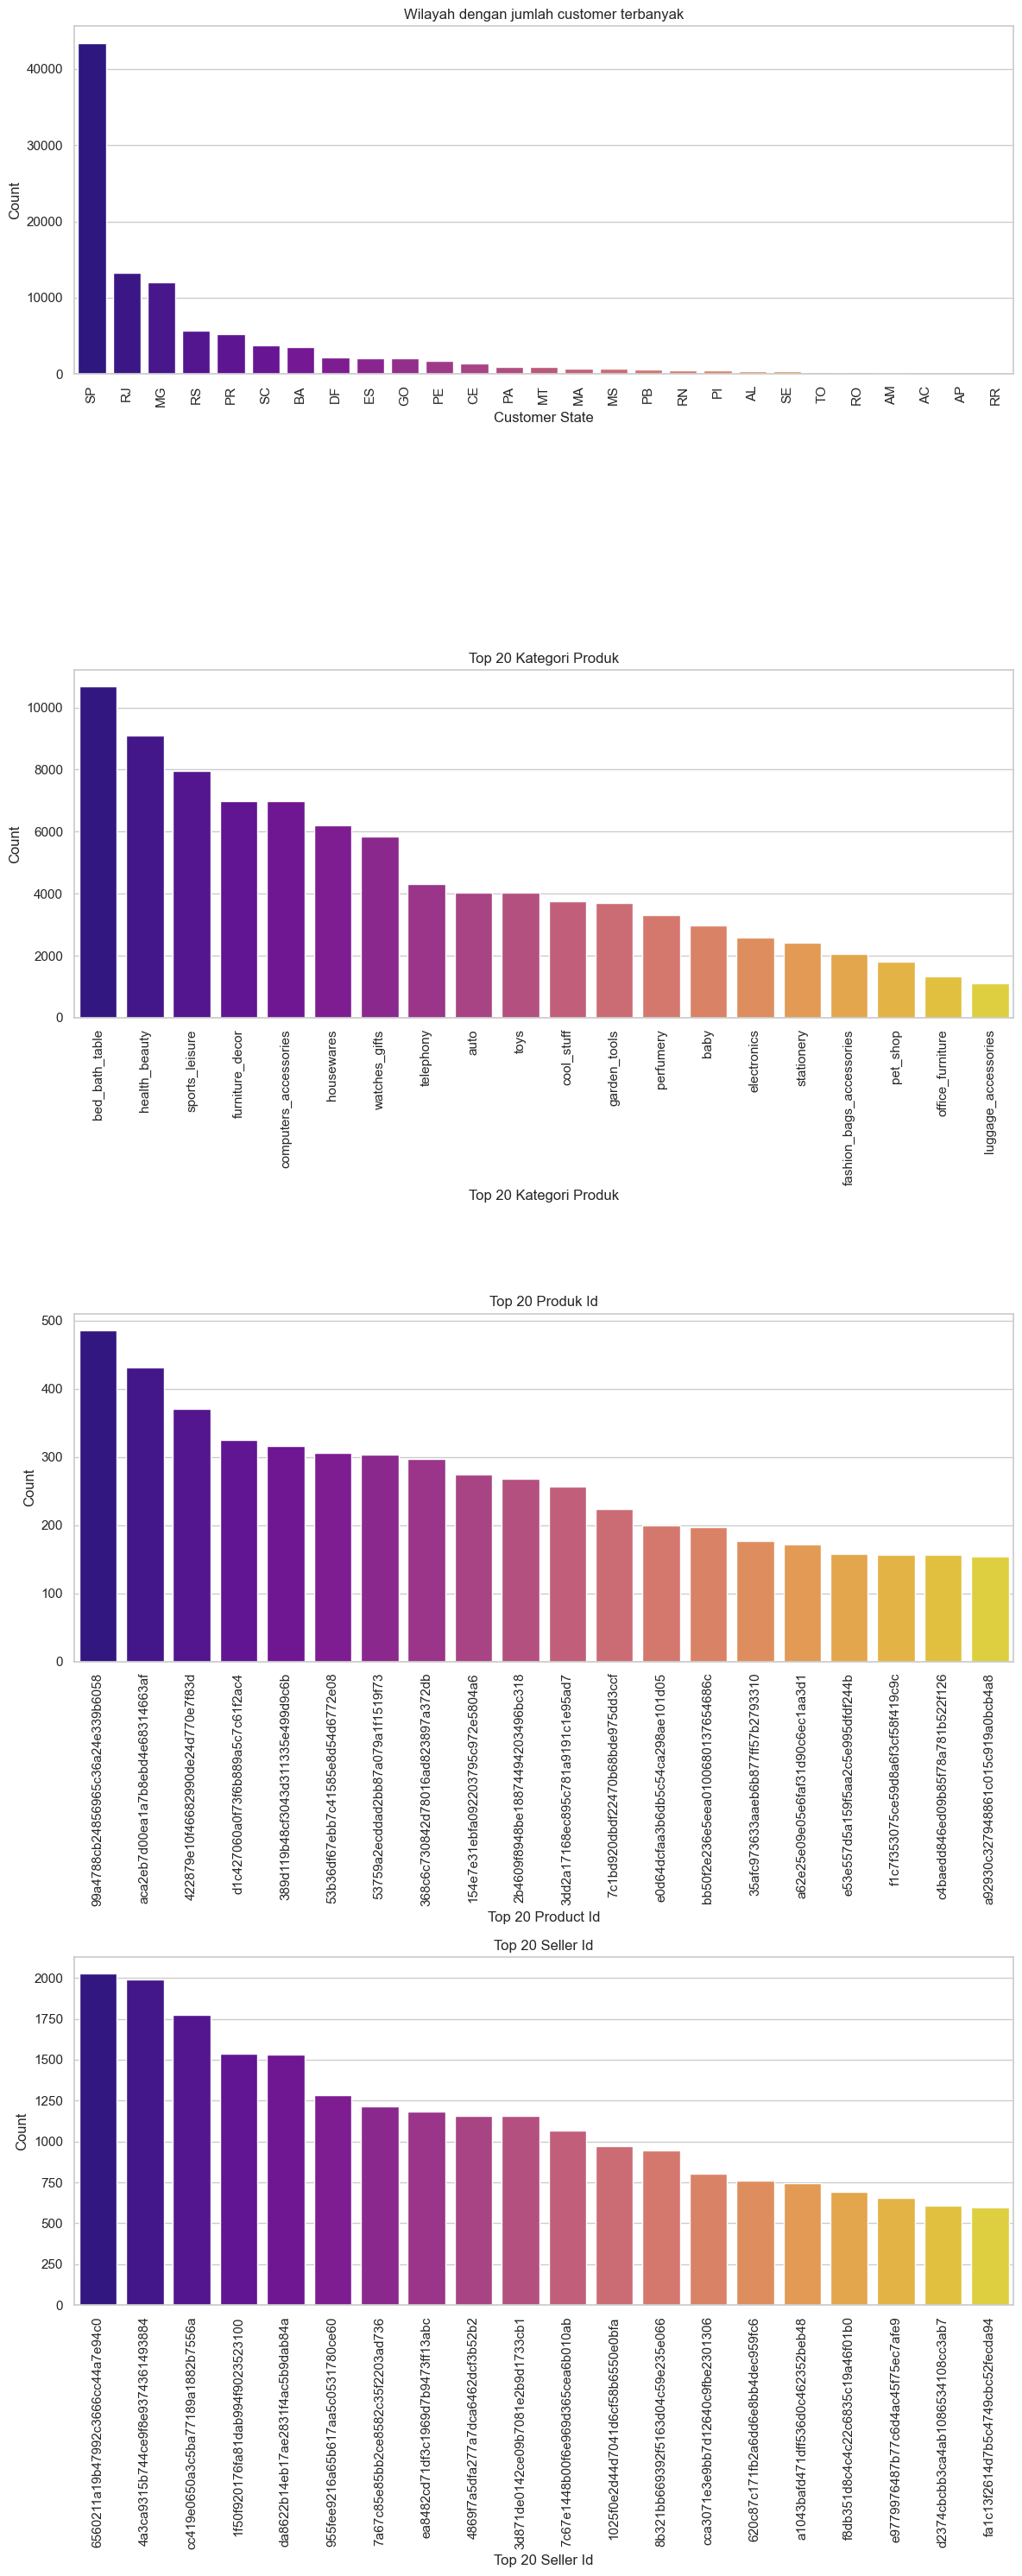

In [72]:
plt.figure(figsize=(12, 30))

# Subplot untuk seller_city
plt.subplot(4, 1, 1)
sns.countplot(data=df, x='customer_state', order=df['customer_state'].value_counts().index, palette='plasma')
plt.xlabel('Customer State')
plt.title('Wilayah dengan jumlah customer terbanyak')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Subplot untuk customer_city
plt.subplot(4, 1, 2)
sns.countplot(data=df, x='product_category_name_english', order=df['product_category_name_english'].value_counts().head(20).index, palette='plasma')
plt.xlabel('Top 20 Kategori Produk')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 20 Kategori Produk')

plt.subplot(4, 1, 3)
sns.countplot(data=df, x='product_id', order=df['product_id'].value_counts().head(20).index, palette='plasma')
plt.xlabel('Top 20 Product Id')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 20 Produk Id')

plt.subplot(4, 1, 4)
sns.countplot(data=df, x='seller_id', order=df['seller_id'].value_counts().head(20).index, palette='plasma')
plt.xlabel('Top 20 Seller Id')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Top 20 Seller Id')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

## Top 10 Kategori Produk dengan Review Score Tertinggi

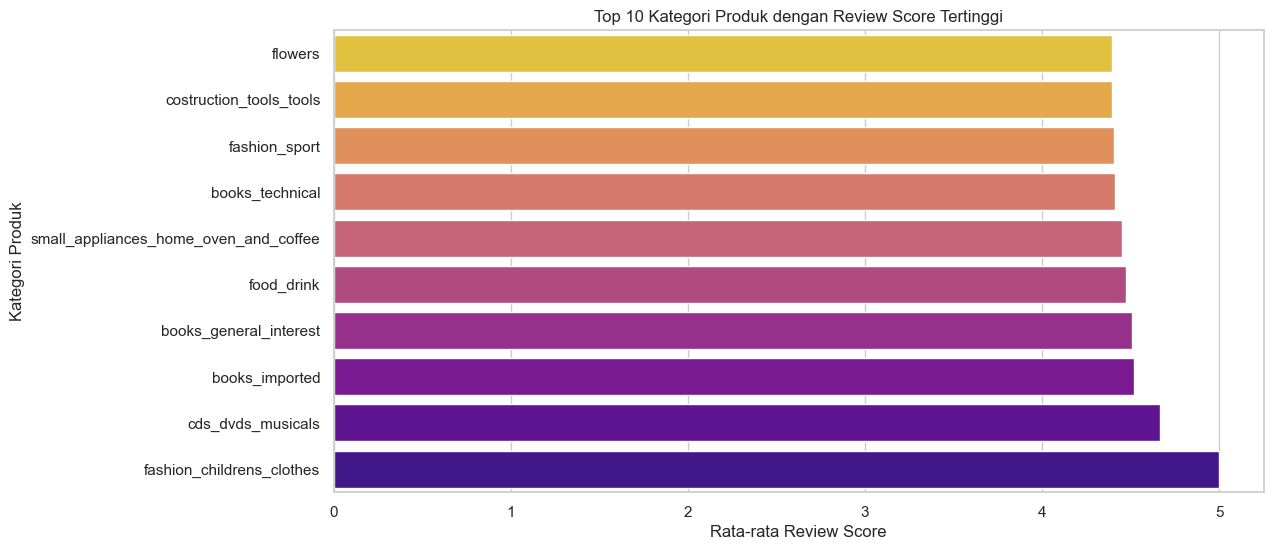

In [73]:
top_10_categories = df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Mengurutkan kategori berdasarkan rata-rata review_score secara menurun
top_10_categories = top_10_categories.sort_values(by='review_score', ascending=False).head(10)

# Mengatur gaya plot menggunakan Seaborn
sns.set(style="whitegrid")

# Membuat plot bar untuk menampilkan 10 kategori produk dengan review score tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_categories, y='product_category_name_english', x='review_score', palette='plasma')
plt.xlabel('Rata-rata Review Score')
plt.ylabel('Kategori Produk')
plt.title('Top 10 Kategori Produk dengan Review Score Tertinggi')
plt.gca().invert_yaxis()  # Memutar sumbu y agar kategori teratas ada di atas
plt.show()

### Tren Jenis pembayaran tahunan

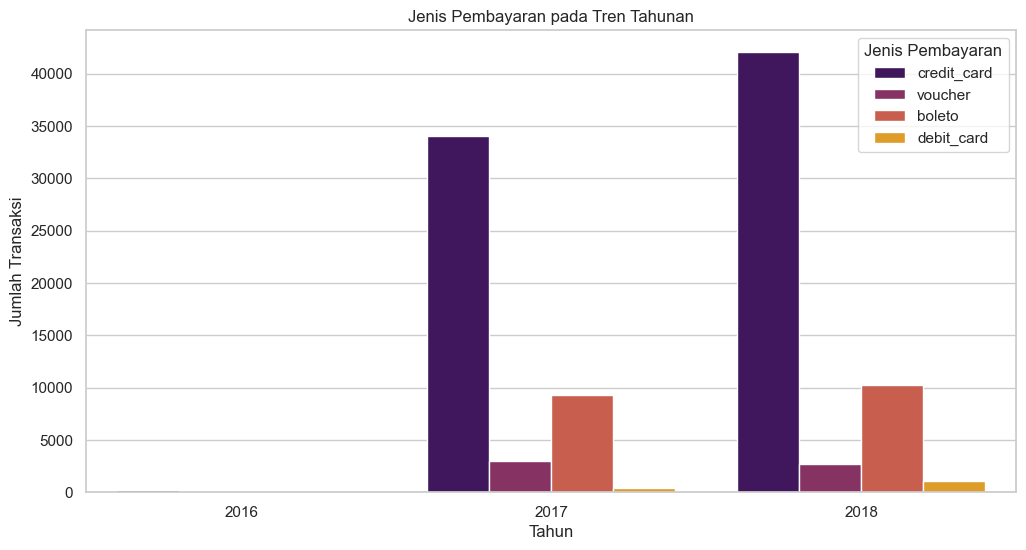

In [74]:
# Visualisasi jenis pembayaran yang dilakukan pada tren tahunan
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='order_purchase_year', hue='payment_type', palette='inferno')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Transaksi')
plt.title('Jenis Pembayaran pada Tren Tahunan')
plt.legend(title='Jenis Pembayaran', title_fontsize='12')

plt.show()

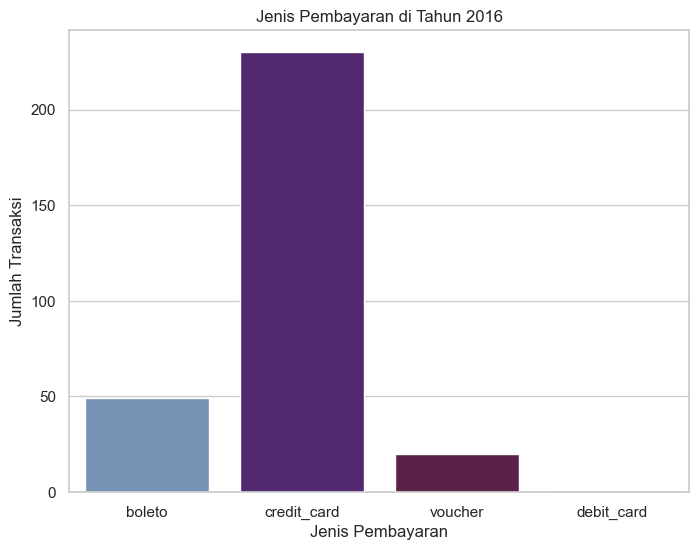

In [75]:
# Memfilter data untuk tahun 2016
df_2016 = df[df['order_purchase_year'] == 2016]

# Visualisasi jenis pembayaran di tahun 2016
plt.figure(figsize=(8, 6))
sns.countplot(data=df_2016, x='payment_type', palette='twilight')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.title('Jenis Pembayaran di Tahun 2016')

plt.show()

In [76]:
df.groupby(['order_purchase_year', 'payment_type']).size()

order_purchase_year  payment_type
2016                 boleto             49
                     credit_card       230
                     debit_card          1
                     voucher            20
2017                 boleto           9289
                     credit_card     34052
                     debit_card        414
                     voucher          2954
2018                 boleto          10217
                     credit_card     42063
                     debit_card       1104
                     voucher          2661
dtype: int64

## Top 10 kategori produk berdasarkan jenis pembayaran

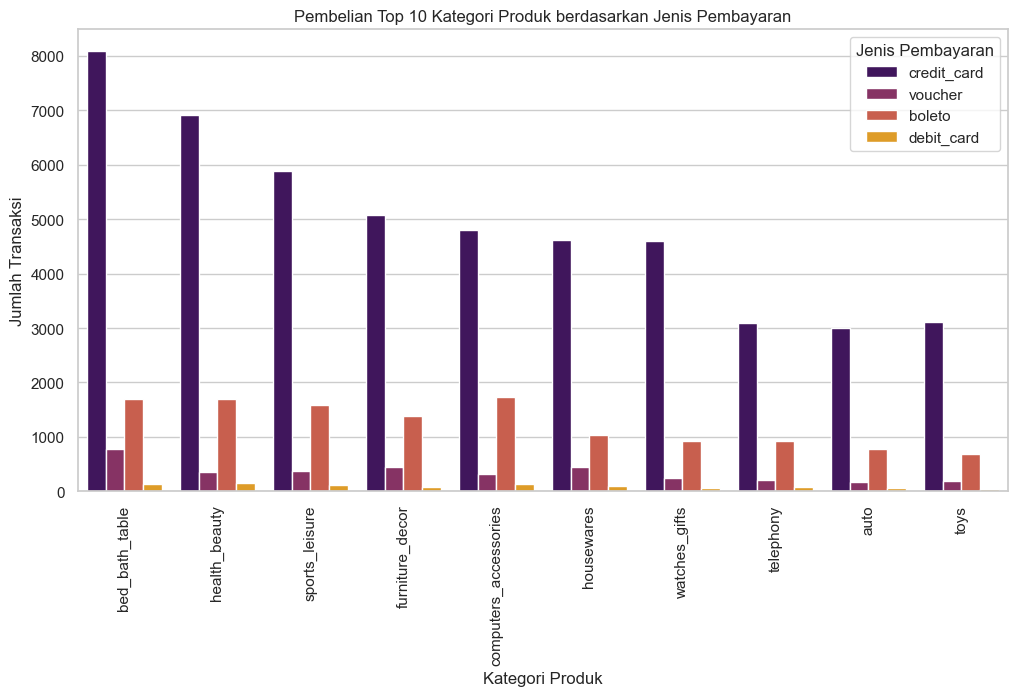

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, 
              x='product_category_name_english', order=df['product_category_name_english'].value_counts().head(10).index, 
              hue='payment_type', 
              palette='inferno')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Transaksi')
plt.title('Pembelian Top 10 Kategori Produk berdasarkan Jenis Pembayaran')
plt.xticks(rotation=90)
plt.legend(title='Jenis Pembayaran', title_fontsize='12')
plt.show()

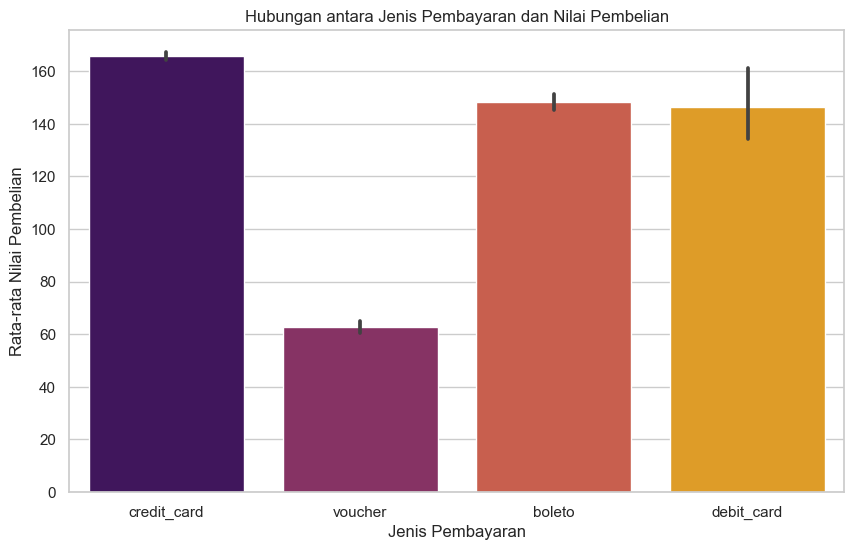

In [78]:
# Visualisasi hubungan antara jenis pembayaran dan nilai pembelian
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='payment_type', y='payment_value', palette='inferno')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Rata-rata Nilai Pembelian')
plt.title('Hubungan antara Jenis Pembayaran dan Nilai Pembelian')

plt.show()

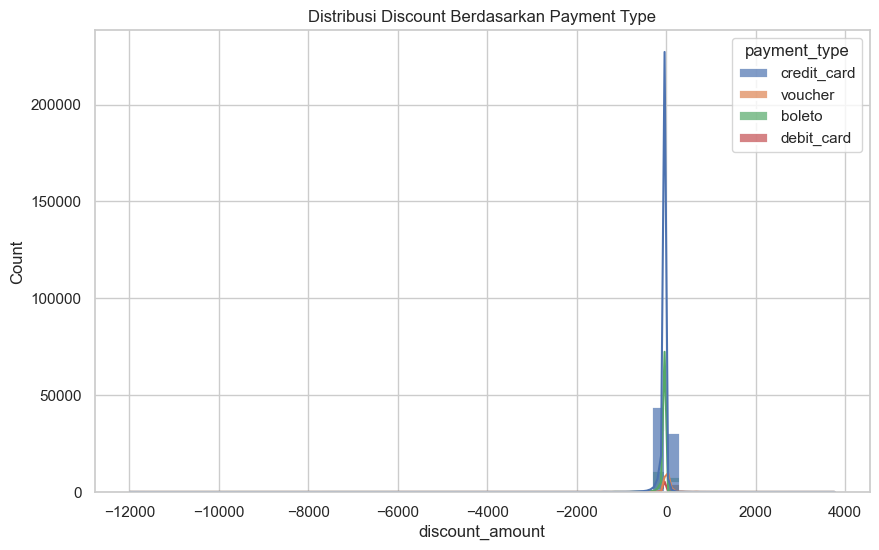

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='discount_amount', hue='payment_type', bins=50, kde=True, linewidth=2, alpha=0.7)
plt.title('Distribusi Discount Berdasarkan Payment Type')
plt.show()


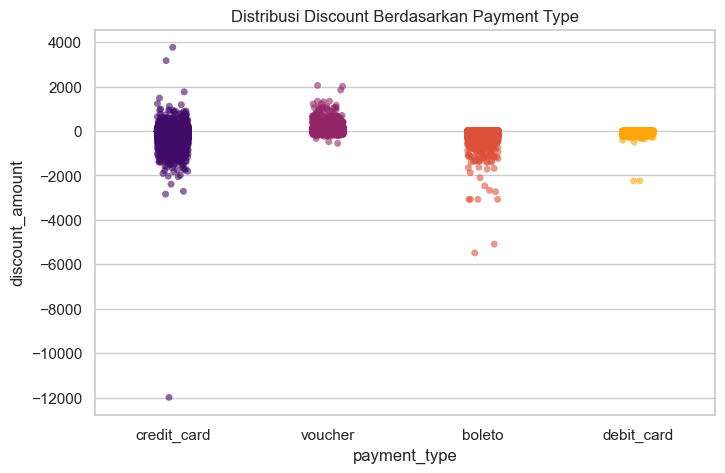

In [80]:
plt.figure(figsize=(8, 5))
sns.stripplot(data=df, x='payment_type', y='discount_amount', alpha=0.6, palette='inferno')
plt.title("Distribusi Discount Berdasarkan Payment Type")
plt.show()


- Credit_Card : pengguna credit card lebih banyak dibanding yang lain karena memiliki fitur discount terbanyak

In [81]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year,discount_amount,discount_percentage,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.87,39.579860,8
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,27.99,93.331110,8
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.40,38.012671,8
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,2018-08-08,2018-08-08 18:37:50,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,2018,-22.76,-19.174389,12
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,2018-08-18,2018-08-22 19:07:58,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,2018,-19.22,-12.020013,9


# Datetime Extraction

In [82]:
datetime_cols.columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')

In [83]:
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_day'] = df['order_purchase_timestamp'].dt.day

df['year_approved_at'] = df['order_approved_at'].dt.year
df['month_approved_at'] = df['order_approved_at'].dt.month
df['day_approved_at'] = df['order_approved_at'].dt.day

df['year_delivered_carrier_date'] = df['order_delivered_carrier_date'].dt.year
df['year_delivered_carrier_date'] = df['order_delivered_carrier_date'].dt.month
df['year_delivered_carrier_date'] = df['order_delivered_carrier_date'].dt.day

df['year_delivered_customer_date'] = df['order_delivered_customer_date'].dt.year
df['month_delivered_customer_date'] = df['order_delivered_customer_date'].dt.month
df['day_delivered_customer_date'] = df['order_delivered_customer_date'].dt.day

df['year_estimated_delivery_date'] = df['order_estimated_delivery_date'].dt.year
df['month_estimated_delivery_date'] = df['order_estimated_delivery_date'].dt.month
df['day_estimated_delivery_date'] = df['order_estimated_delivery_date'].dt.day

df['year_limit_date'] = df['shipping_limit_date'].dt.year
df['month_limit_date'] = df['shipping_limit_date'].dt.month
df['day_limit_date'] = df['shipping_limit_date'].dt.day

df['year_review_creation_date'] = df['review_creation_date'].dt.year
df['month_review_creation_date'] = df['review_creation_date'].dt.month
df['day_review_creation_date'] = df['review_creation_date'].dt.day

df['year_review_answer_timestamp'] = df['review_answer_timestamp'].dt.year
df['month_review_answer_timestamp'] = df['review_answer_timestamp'].dt.month
df['day_review_answer_timestamp'] = df['review_answer_timestamp'].dt.day



In [84]:
df.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,review_creation_date,review_answer_timestamp,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,order_purchase_year,discount_amount,discount_percentage,delivery_time,purchase_year,purchase_month,purchase_day,year_approved_at,month_approved_at,day_approved_at,year_delivered_carrier_date,year_delivered_customer_date,month_delivered_customer_date,day_delivered_customer_date,year_estimated_delivery_date,month_estimated_delivery_date,day_estimated_delivery_date,year_limit_date,month_limit_date,day_limit_date,year_review_creation_date,month_review_creation_date,day_review_creation_date,year_review_answer_timestamp,month_review_answer_timestamp,day_review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.87,39.579860,8,2017,10,2,2017,10,2,4,2017,10,10,2017,10,18,2017,10,6,2017,10,11,2017,10,12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,27.99,93.331110,8,2017,10,2,2017,10,2,4,2017,10,10,2017,10,18,2017,10,6,2017,10,11,2017,10,12
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59,4.0,2017-10-11,2017-10-12 03:43:48,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares,2017,11.40,38.012671,8,2017,10,2,2017,10,2,4,2017,10,10,2017,10,18,2017,10,6,2017,10,11,2017,10,12
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46,4.0,2018-08-08,2018-08-08 18:37:50,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery,2018,-22.76,-19.174389,12,2018,7,24,2018,7,26,26,2018,8,7,2018,8,13,2018,7,30,2018,8,8,2018,8,8
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,2018-08-18,2018-08-22 19:07:58,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto,2018,-19.22,-12.020013,9,2018,8,8,2018,8,8,8,2018,8,17,2018,9,4,2018,8,13,2018,8,18,2018,8,22


In [85]:
df = df.drop(columns=['order_purchase_year', 'order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
         'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp', 'order_id', 'product_id', 'seller_id', 'seller_zip_code_prefix'])

In [86]:
df.head()

,order_status,customer_zip_code_prefix,customer_city,customer_state,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,product_category_name_english,discount_amount,discount_percentage,delivery_time,purchase_year,purchase_month,purchase_day,year_approved_at,month_approved_at,day_approved_at,year_delivered_carrier_date,year_delivered_customer_date,month_delivered_customer_date,day_delivered_customer_date,year_estimated_delivery_date,month_estimated_delivery_date,day_estimated_delivery_date,year_limit_date,month_limit_date,day_limit_date,year_review_creation_date,month_review_creation_date,day_review_creation_date,year_review_answer_timestamp,month_review_answer_timestamp,day_review_answer_timestamp
0,delivered,3149,sao paulo,SP,29.99,8.72,1.0,credit_card,1.0,18.12,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,housewares,11.87,39.579860,8,2017,10,2,2017,10,2,4,2017,10,10,2017,10,18,2017,10,6,2017,10,11,2017,10,12
1,delivered,3149,sao paulo,SP,29.99,8.72,3.0,voucher,1.0,2.00,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,housewares,27.99,93.331110,8,2017,10,2,2017,10,2,4,2017,10,10,2017,10,18,2017,10,6,2017,10,11,2017,10,12
2,delivered,3149,sao paulo,SP,29.99,8.72,2.0,voucher,1.0,18.59,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,maua,SP,housewares,11.40,38.012671,8,2017,10,2,2017,10,2,4,2017,10,10,2017,10,18,2017,10,6,2017,10,11,2017,10,12
3,delivered,47813,barreiras,BA,118.70,22.76,1.0,boleto,1.0,141.46,4.0,29.0,178.0,1.0,400.0,19.0,13.0,19.0,belo horizonte,SP,perfumery,-22.76,-19.174389,12,2018,7,24,2018,7,26,26,2018,8,7,2018,8,13,2018,7,30,2018,8,8,2018,8,8
4,delivered,75265,vianopolis,GO,159.90,19.22,1.0,credit_card,3.0,179.12,5.0,46.0,232.0,1.0,420.0,24.0,19.0,21.0,guariba,SP,auto,-19.22,-12.020013,9,2018,8,8,2018,8,8,8,2018,8,17,2018,9,4,2018,8,13,2018,8,18,2018,8,22


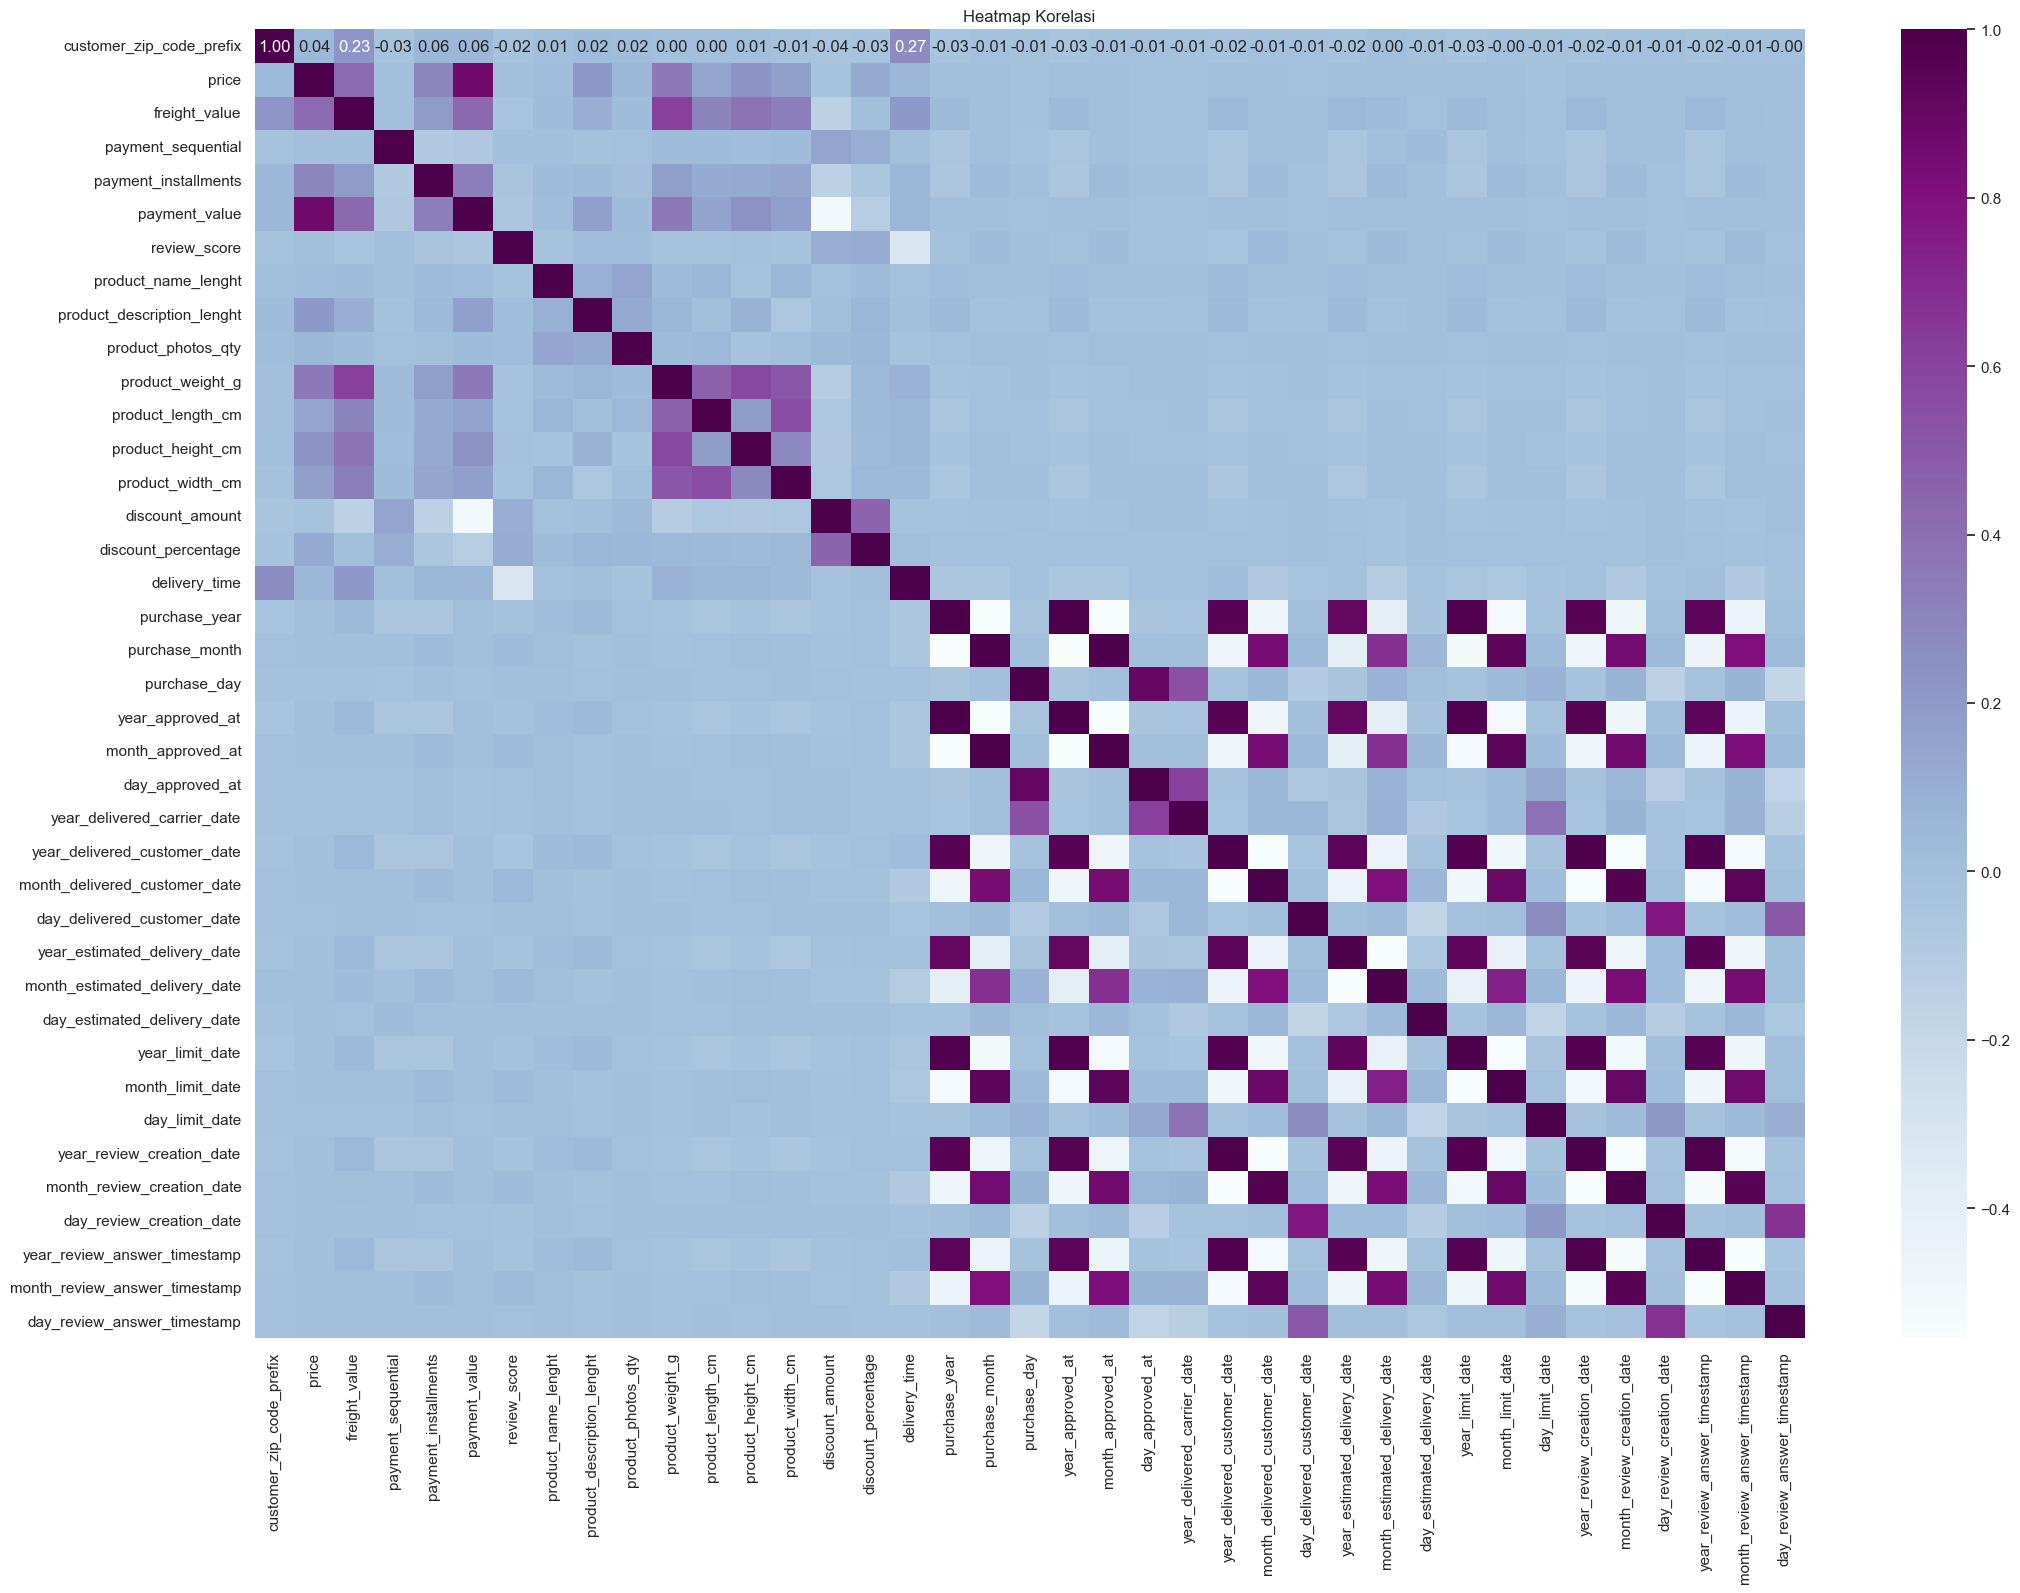

In [92]:
numeric_corr = df.select_dtypes(include=['number'])

correlation_matrix = numeric_corr.corr()


# Buat heatmap korelasi dengan seaborn
plt.figure(figsize=(25, 17))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt=".2f")
plt.title("Heatmap Korelasi")
plt.show()

In [93]:
corr_matrix = numeric_corr.corr()

high_corr = corr_matrix.abs() > 0.8

correlated_features = np.where((high_corr) & (corr_matrix != 1)) 
correlated_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*correlated_features)]

print("Fitur yang berkorelasi lebih dari 80%:")
for pair in correlated_pairs:
    print(pair[0], "dan", pair[1], ":", corr_matrix.loc[pair[0], pair[1]])

Fitur yang berkorelasi lebih dari 80%:
price dan payment_value : 0.8722413804858177
payment_value dan price : 0.8722413804858177
purchase_year dan year_approved_at : 0.998950488598347
purchase_year dan year_delivered_customer_date : 0.9517384249673393
purchase_year dan year_estimated_delivery_date : 0.9099599444771397
purchase_year dan year_limit_date : 0.9807436551388636
purchase_year dan year_review_creation_date : 0.9568659306291663
purchase_year dan year_review_answer_timestamp : 0.9439065376831097
purchase_month dan month_approved_at : 0.9961221875187544
purchase_month dan month_delivered_customer_date : 0.836666349787581
purchase_month dan month_limit_date : 0.9338359136936724
purchase_month dan month_review_creation_date : 0.8509877123042684
purchase_month dan month_review_answer_timestamp : 0.8103171975182268
purchase_day dan day_approved_at : 0.9069660949065664
year_approved_at dan purchase_year : 0.998950488598347
year_approved_at dan year_delivered_customer_date : 0.95273714

Terdapat kebanyakan fitur yang memiliki nilai hampir 100% multico, jadi dalam hal ini model yang akan digunakan adalah Decision Tree Regressor yang dianggap robust terhadap multicolinearity

# Split Data

In [94]:
X = df.drop(columns='price')
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82443, 45), (20611, 45), (82443,), (20611,))

In [95]:
numerical_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy='mean')),
     ('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [96]:
preprocessor = ColumnTransformer([
    ('numeric',numerical_pipeline, ['customer_zip_code_prefix', 'freight_value', 'payment_sequential', 'payment_installments', 'payment_value', 'product_name_lenght', 
                                    'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 
                                    'discount_amount', 'delivery_time', 'purchase_year', 'year_approved_at',  
                                    'year_delivered_carrier_date', 'year_delivered_customer_date',
                                    'year_estimated_delivery_date',  
                                    'year_limit_date',  'year_review_creation_date', 	
                                    'year_review_answer_timestamp', ]),

    ('categoric',categorical_pipeline, ['customer_city', 'customer_state',
                                        'payment_type', 'review_score', 'seller_city', 'seller_state', 'product_category_name_english', 'purchase_month', 'purchase_day',
                                        'month_delivered_customer_date', 'month_approved_at', 'day_approved_at', 'day_delivered_customer_date', 'month_estimated_delivery_date', 'day_estimated_delivery_date',
                                        'month_limit_date', 'day_limit_date', 'month_review_creation_date', 'day_review_creation_date', 'month_review_answer_timestamp', 'day_review_answer_timestamp'])
])

In [97]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', DecisionTreeRegressor())
])

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['customer_zip_code_prefix',
                                                   'freight_value',
                                                   'payment_sequential',
                                                   'payment_installments',
                                                   'payment_value',
                                                   'product_name_lenght',
                                                   'product_description_lenght',
                                                   'product_photos_qty',
                                                   'product_weight_g',
                                                   'product_length_...
                                                   'month_delivered_customer_date',
                                                   'month_approved_at',
                                                   'day_approved_at',
                                                   'day_delivered_customer_date',
                                                   'month_estimated_delivery_date',
                                                   'day_estimated_delivery_date',
                                                   'month_limit_date',
                                                   'day_limit_date',
                                                   'month_review_creation_date',
                                                   'day_review_creation_date',
                                                   'month_review_answer_timestamp',
                                                   'day_review_answer_timestamp'])])),
                ('algo', DecisionTreeRegressor())])

In [99]:
pipeline.score(X_train, y_train)

1.0

In [100]:
pipeline.score(X_test, y_test)

0.9568807940456846

In [101]:
y_pred = pipeline.predict(X_test)

In [106]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 1444.2103657804087
Mean Absolute Error (MAE): 2.226213672310907
R-squared (R2): 0.9568807940456846


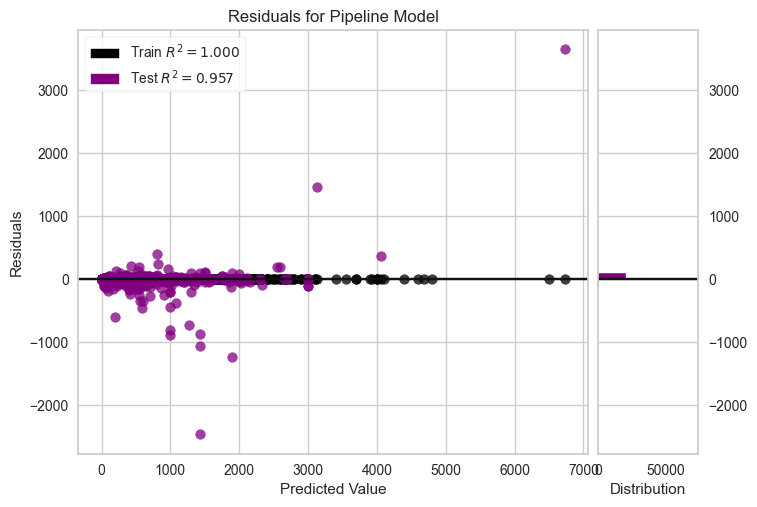

<Axes: title={'center': 'Residuals for Pipeline Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [104]:
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.contrib.wrapper import wrap

best_model = wrap(pipeline)

visualizer = ResidualsPlot(best_model, train_color='black', test_color='purple')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

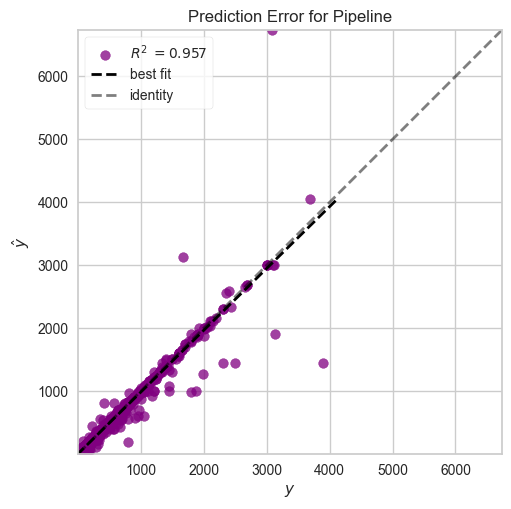

<Axes: title={'center': 'Prediction Error for Pipeline'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [105]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(best_model, line_color='black')
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

for collection in visualizer.ax.collections:
    collection.set_facecolor('purple')  # Mengubah warna isi scatter

visualizer.show()

### Insight dari Hasil Model:

MSE yang Rendah: MSE yang rendah menunjukkan bahwa berdasarkan model diatas memiliki tingkat kesalahan yang rendah dalam memprediksi harga. Ini merupakan indikasi yang baik karena model tersebut cenderung mendekati harga yang sebenarnya dengan baik.

MAE yang Rendah: MAE yang rendah juga menunjukkan berdasarkan model diatas memiliki kesalahan yang rendah dalam memprediksi harga. MAE adalah ukuran dari kesalahan mutlak rata-rata, dan nilai rendah menunjukkan prediksi yang akurat.

R-squared Tinggi: R-squared (R2) adalah ukuran kebaikan kesesuaian model. Nilai R2 mendekati 1 (0.979) menunjukkan bahwa berdasarkan model diatas mampu menjelaskan sebagian besar variasi dalam harga, sehingga model ini sangat sesuai dengan data.

### Rekomendasi bagi Perusahaan:

1. Perusahaan yang Fokus pada Penjualan Online dan Peningkatan Penjualan:

- Tren penjualan tahunan yang meningkat signifikan dari 2016 hingga 2018 menunjukkan potensi bisnis yang kuat.

- Perusahaan yang berfokus pada penjualan online dan strategi pemasaran yang efektif untuk meningkatkan penjualan akan cocok dengan profil ini.

2. Perusahaan dengan Kebijakan Diskon yang Fleksibel:

- Penurunan rata-rata pembelian dari 2016 ke 2017 akibat penurunan diskon, diikuti dengan kenaikan pembelian dari 2017 ke 2018 karena kenaikan diskon, mengindikasikan pentingnya strategi diskon yang fleksibel.

- Perusahaan yang dapat menyesuaikan kebijakan diskon berdasarkan tren pasar dan perilaku pelanggan akan dapat memanfaatkan situasi ini.

3. Perusahaan yang Berfokus pada Kategori Produk dengan Diskon Tertinggi:

- Kategori produk dengan diskon tertinggi, seperti diapers, flowers, music, home appliances, dan lainnya, dapat menjadi fokus bagi perusahaan untuk meningkatkan penjualan dan profitabilitas.

- Perusahaan yang dapat menyediakan dan memasarkan produk-produk dalam kategori ini dengan strategi diskon yang tepat akan memiliki keunggulan kompetitif.

4. Perusahaan dengan Fokus pada Pengiriman yang Lebih Cepat:

- Hubungan negatif antara waktu pengiriman dan tingkat kepuasan pelanggan mengindikasikan pentingnya pengiriman yang lebih cepat.

- Perusahaan yang dapat memperbaiki proses logistik dan pengiriman untuk meminimalkan waktu tunggu akan dapat meningkatkan kepuasan pelanggan.

5. Perusahaan yang Menerima Berbagai Metode Pembayaran:

- Proporsi penggunaan jenis pembayaran yang beragam, terutama kartu kredit, boleto, voucher, dan debit card, menunjukkan perlunya menerima berbagai opsi pembayaran.
Perusahaan yang dapat menyediakan berbagai metode pembayaran akan dapat menjangkau lebih banyak pelanggan.